In [1]:
import re
import pandas as pd
import numpy as np
import torch
import umap
import os
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline
from tqdm.notebook import tqdm
from collections import Counter
# from wordcloud import WordCloud
# from konlpy.tag import Okt $23456
import matplotlib.font_manager as fm
import urllib.request

from urllib.parse import urlparse,parse_qs
import requests
from bs4 import BeautifulSoup
import json
import time
import datetime
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import unicodedata
import networkx as nx
from sklearn.manifold import MDS
from collections import defaultdict, Counter
from wordcloud import WordCloud
from konlpy.tag import Okt
import matplotlib as mpl
import platform
from matplotlib import font_manager as fm
import shutil
import platform

In [ ]:
# def install_font(font_source_path):
#     system = platform.system()
#
#     if system == 'Windows':
#         font_dir = os.path.join(os.environ['WINDIR'], 'Fonts')
#     elif system == 'Darwin':
#         font_dir = os.path.expanduser('~/Library/Fonts')
#     elif system == 'Linux':
#         font_dir = os.path.expanduser('~/.fonts')
#         os.makedirs(font_dir, exist_ok=True)
#     else:
#         raise OSError("Unsupported OS")
#
#     font_filename = os.path.basename(font_source_path)
#     dest_path = os.path.join(font_dir, font_filename)
#
#     if not os.path.exists(dest_path):
#         shutil.copy(font_source_path, dest_path)
#         print(f"✅ 폰트 복사 완료: {dest_path}")
#     else:
#         print(f"ℹ️ 이미 설치된 폰트: {dest_path}")
#
#     return dest_path
# font_path = install_font('../src/NanumGothic.ttf')
# font_prop = fm.FontProperties(fname=font_path)

<h1 style="margin:5px;">파이썬 데이터 분석- "탄핵" 키워드의 네이버 뉴스 댓글을 통한 각 언론사에서 나타나는 댓글의 특징과 감성분석</h1>
<h2>
<ul style="list-style-type: none">
    <li style="">202304305 정성현</li>
    <li style="">202104234 안성준</li>
    <li style="">202104241 여동수</li>
</ul>
</h2>
<hr>
<h2 style="margin:5px;" >차례</h2>
<h3>
<ol>
  <li> 들어가며</li>
  <li> 데이터 소개</li>
  <li> 데이터 수집 방법-크롤링</li>
  <li> 데이터 분석-댓글 작성자의 언론사 편향</li>
  <li> 데이터 분석- 댓글 작성 시간</li>
  <li> 데이터 분석- 감정 분석</li>
  <li> 데이터 분석-</li>
  <li> 결론 </li>
  <li> 마치며 </li>
</ol>
<h3>


<h2> 1. 들어가며 </h2>

<p><img src="./notebook_img/EAI_2025_1.png" alt="이미지 오류">
<img src="./notebook_img/EAI_2025_2.png" alt="이미지 오류">
<h4>EAI의 2025 정치 양극화 인식조사</h4>
</p>






<h2> 2.데이터 소개 </h2>

성공: 나경원 "한동훈, 도저히 같이 할 수 없는 후보…탄핵 선동" , https://n.news.naver.com/article/015/0005118778?sid=100 , 2025-04-14 , 성공: 1939 실패: 32 총 댓글 개수: 731294


In [3]:
before_integrated=pd.read_csv("../src/news_comments/JTBC/2024-12-09_JTBC_김상욱 _탄핵 찬성..논의 중인 의원들 있어, 탄핵안 통과 충분_.csv")

In [4]:
before_integrated.head(5)

user_nickname userIdNo                                           comments  \
0      kang****    2uUqJ             김상욱 의원님 화이팅 입니다. 힘내세요. 국민들이 기억할 것 입니다.   
1      gsy7****      NaN                                                NaN   
2      hyun****    4nbAN  다행이다 젊은 보수가 있다는게 \n응원합니다 그래야 보수가 살수있어요\n견제도 할수...   
3      syki****     59jX           이래야 국회의원이라할수있지.. 객관적이고 이성적인 판단에 박수를 보냅니다   
4      anto****    2mW3x  머털도사와 108요괴라는 만화가 있다 거기서 108요괴가 어떻게 퇴치되는지 보면 저...   

   visible  replyLevel                   regTime     parentCommentNo  \
0     True           1  2024-12-10T10:38:22+0900  845152822566584479   
1    False           1  2024-12-10T10:38:06+0900  845152805487378484   
2     True           1  2024-12-10T10:38:37+0900  845152838974701852   
3     True           1  2024-12-10T10:39:28+0900  845152893114777828   
4     True           1  2024-12-10T10:38:48+0900  845152850064441741   

   sympathyCount  antipathyCount  replyAllCount  
0           1270              38             21  
1              0               0             16  
2            328              10              3  
3            219               6              3  
4            105               2              6

In [5]:
df=pd.read_csv("../src/integrated_csv/integrated_csv.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731294 entries, 0 to 731293
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   press_name       731191 non-null  object
 1   date             731294 non-null  object
 2   user_nickname    731294 non-null  object
 3   userIdNo         575498 non-null  object
 4   comments         575498 non-null  object
 5   visible          731294 non-null  bool  
 6   replyLevel       731294 non-null  int64 
 7   regTime          731294 non-null  object
 8   parentCommentNo  731294 non-null  int64 
 9   sympathyCount    731294 non-null  int64 
 10  antipathyCount   731294 non-null  int64 
 11  replyAllCount    731294 non-null  int64 
dtypes: bool(1), int64(5), object(6)
memory usage: 62.1+ MB


In [7]:
df.query("press_name.isna()")

press_name        date user_nickname userIdNo  \
660378        NaN  2025-04-10      kcyn****     kE4J   
660379        NaN  2025-04-10      tele****    1zZa0   
660380        NaN  2025-04-10      xinz****   2cw9SF   
660381        NaN  2025-04-10      choj****     GxDv   
660382        NaN  2025-04-10      dyhw****    9sk0Q   
...           ...         ...           ...      ...   
660476        NaN  2025-04-10      baek****    bJ1gy   
660477        NaN  2025-04-10      rnjs****    3Ythr   
660478        NaN  2025-04-10      3259****    ckKf0   
660479        NaN  2025-04-10      deri****    3eqzu   
660480        NaN  2025-04-10      bobo****    3Enrp   

                                                 comments  visible  \
660378         법꾸러지들.\n전직대통령들은전부.포토라인섰다.\n탄핵된주제에.\n대통령대우냐     True   
660379  누구한테는 절대 안된다고 기자들 앞에서 전국민에게 개망신을 주어 결국 자살하게 만들...     True   
660380                                무슨특해냐.출석하면 법정구속해야지!     True   
660381  지하주차장으로 곧 들어가게 될 것니다. \n구속이 되면 자동으로 호송차대절해서 법원...     True   
660382                                바퀴벌레는 어둡고 습한데를 좋아해요     True   
...                                                   ...      ...   
660476                                  빨리 사형선고하고 집행해라!!!     True   
660477  이인간은 뭔데 다 특혜냐 이러니 저 정신없는 인간들이 왕인줄알고 설치잖아 법앞에 모...     True   
660478      그렇게 요청해 달라고 간청하는 거냐? \n납짝 엎드려 하는 짓이 부끄럽지도 않나?     True   
660479                                    홧팅 윤통 꼭명예 회복하세요     True   
660480  계엄은 국민계몽맞고 계엄으로 아무사고없고 평화적인데  호시탐탐 대통령 끌어내리려 기...     True   

        replyLevel                   regTime     parentCommentNo  \
660378           1  2025-04-11T14:08:14+0900  856484440472289376   
660379           1  2025-04-11T14:10:30+0900  856484587222597838   
660380           1  2025-04-11T14:15:45+0900  856484924864069893   
660381           1  2025-04-11T15:12:15+0900  856488565016625251   
660382           1  2025-04-11T14:17:09+0900  856485014706061382   
...            ...                       ...                 ...   
660476           1  2025-04-11T23:15:08+0900  856519674739818544   
660477           1  2025-04-11T15:03:28+0900  856487999037243594   
660478           1  2025-04-11T14:14:42+0900  856484857469993204   
660479           1  2025-04-11T18:56:53+0900  856503036489498881   
660480           1  2025-04-11T16:37:36+0900  856494063480733921   

        sympathyCount  antipathyCount  replyAllCount  
660378            136               9              5  
660379            103               1              1  
660380             35               4              2  
660381             30               1              0  
660382             28               3              0  
...               ...             ...            ...  
660476              0               1              0  
660477              0               1              0  
660478              0               1              0  
660479              0               2              0  
660480              0               2              2  

[103 rows x 12 columns]

In [8]:
df=df.query("press_name.notna()")

In [9]:
df.query("press_name.isna()")

Empty DataFrame
Columns: [press_name, date, user_nickname, userIdNo, comments, visible, replyLevel, regTime, parentCommentNo, sympathyCount, antipathyCount, replyAllCount]
Index: []

In [10]:
df.query('visible == False').head(1)

press_name        date user_nickname userIdNo comments  visible  \
11  중앙일보  2025-01-09      dewy****      NaN      NaN    False   

    replyLevel                   regTime     parentCommentNo  sympathyCount  \
11           1  2025-01-09T17:37:14+0900  847962946872016996              0   

    antipathyCount  replyAllCount  
11               0              0

In [11]:
df.head()

press_name        date user_nickname userIdNo  \
0  중앙일보  2025-01-09      seki****    6boTo   
1  중앙일보  2025-01-09      lafa****    ddbVw   
2  중앙일보  2025-01-09      dean****    1CqXM   
3  중앙일보  2025-01-09      alfn****    4GZw0   
4  중앙일보  2025-01-09      th******     Drxg   

                                            comments  visible  replyLevel  \
0  여론에는 흔들리지 않겠지만, 전라도 민주당의 지침을 따를 거면서,,,,걸래같은 것들...     True           1   
1  헌재가 수사 기록을 송부받은 것은 내란죄를 빼고 심리 하겠다는 것입니다. 지금 헌재...     True           1   
2  헌재 탄핵심판은 180일 이내에 결론내면 된다. 왜 이렇게 심리 속도가 느리냐고 따...     True           1   
3  이재명 대표의 재판은 너무 이례적이게 늦는거 같고, 민주당이 신청한 국무위원들의 탄...     True           1   
4                        이재명 재판하고 비교해보면 양심이 흔들릴거다...     True           1   

                    regTime     parentCommentNo  sympathyCount  \
0  2025-01-09T16:22:50+0900  847958153520742764            154   
1  2025-01-09T16:18:07+0900  847957849668583484             70   
2  2025-01-09T16:24:48+0900  847958280071283034             55   
3  2025-01-09T16:27:23+0900  847958446803255471             40   
4  2025-01-09T16:24:31+0900  847958261297578225             21   

   antipathyCount  replyAllCount  
0              23             14  
1              14              5  
2              11              4  
3               1              0  
4               3              1

값이 있는 댓글 + 숨김처리 개수= 총 댓글수

In [13]:
df['comments'].notnull().sum() + df.query('visible == False').shape[0]

731191

In [14]:
df.describe(
    include="object"
)

press_name        date user_nickname userIdNo comments  \
count       731191      731191        731191   575403   575403   
unique          57         132         84110   187527   513518   
top     연합뉴스  2024-12-27      park****    3leoB    응원합니다   
freq        185404       19742          2262      147      125   

                         regTime  
count                     731191  
unique                    615809  
top     2024-12-27T11:38:02+0900  
freq                          11

<h2> 3. 크롤링 </h2>


In [15]:

# 사용자 에이전트 정의
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36'
}
crawling_succ_count=0
crawling_fail_count=0
total_crawling_comment=0

# 뉴스 URL 수집 함수
def news_url(query, date1) -> tuple[list, list, datetime.date]:
    page = 1
    url_list = []
    title_list = []
    link_set = set()
    one_day = datetime.timedelta(days=1)
    date2= date1+ one_day
    date1_str= str(date1).replace("-", ".")
    date2_str=str(date2).replace("-", ".")
    date1_str_not_separated= str(date1).replace("-", "")
    date2_str_not_separated= str(date2).replace("-", "")



    while page <= 150:
        #url에 대해
        # url = (
        #         "https://m.search.naver.com/search.naver?where=m_news&sm=tab_pge&query="
        #         + query +
        #         "&sort=0&photo=0&field=0&pd=1&ds=&de=&cluster_rank=129&mynews=0&office_type=0"
        #         "&office_section_code=0&news_office_checked=&nso=so:r,p:1w,a:all&start=" + str(page) #start은 최소 1 최대 1000임
        # )
        url= (
                "https://m.search.naver.com/search.naver?ssc=tab.m_news.all&query="
                + query + "&sm=mtb_opt&sort=0&photo=0&field=0&pd=3&ds="
                + date1_str + "&de=" + date2_str + "&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom"
                + date1_str_not_separated + "to" + date1_str_not_separated + "&is_sug_officeid=0&office_category=0&service_area=0" + str(page)
        )
        headers={
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
            'referer':url
        }

        response = requests.get(url, headers=headers)
        html = response.text
        soup = BeautifulSoup(html, "lxml")
        # atags = soup.select('.news_tit')
        #위에 atags=soup.select('.news_tit')은 위 response로 받아온 html에서 뉴스 링크가 있는 a태그에 있는 클래스였는데 4/28일 확인해보니까
        #이부분이 암호화 되어서 이 코드가 더 이상 유효하지 않는거 같습니다.
        atags = soup.select('._AuHeQ05X7PwSlhb6H2B') #처럼 암호화 된 부분을 확인해서 넣으면 작동하긴 하는데 이게 나중에 어떻게 변할지 모르겠습니다.
        print(atags)
        for i in atags:
            if "https://n.news.naver.com/" in i['href']:
                url_list.append(i['href'])
                news_title_name=get_title_name(i)
                title_list.append(news_title_name)
        if len(atags) < 15:
            break
        # page += 15
        page+= 150
        time.sleep(0.5)

    return url_list ,title_list, date1  #zip으로 묶거나 받는 변수를 2개 나 튜플로 해야함

<img src="./notebook_img/naver_news.png">

In [16]:

#언론사 id(oid_2)를 언론사 이름으로 바꾸는 함수  ex) "023" -> "연합뉴스"
# html요청 없이 따로 딕셔너리 형태로 만들어서 사용하면  더 빨라지는데 언론사 수가 생각보다 많아서 그냥 이렇게 했습니다.
def get_press_name(press_id):
    url_company='https://news.naver.com/main/officeList.naver'
    html_company = urllib.request.urlopen(url_company).read()
    soup_company = BeautifulSoup(html_company, "lxml")
    title_company=soup_company.find_all(class_='list_press nclicks(\'rig.renws2pname\')')
    for i in title_company:
        parts= urlparse(i.attrs['href'])
        if parse_qs(parts.query)['officeId'][0]==press_id:
            news_name = i.text.strip()
            return news_name


# 뉴스 이름을 html에서 가져오는 함수- news_url 함수 안에서 사용해서 별도의 html요청 없이 링크를 가져오려고 하는 html에서 추출
def get_title_name(atag):
    news_title_name=atag.find('span').text.strip()
    print(news_title_name) #가져 오는 뉴스 이름 확인용
    return news_title_name



# 댓글 수집 함수
def comment(url_list,news_title_list, news_date):
    global crawling_succ_count
    global crawling_fail_count
    global total_crawling_comment
    url_total_num= len(url_list)
    url_list_num=0
    news_title_list_num=0
    total_comment = [];user_nickname=[];comments=[];userIdNo=[];visible=[];replyLevel=[];regTime=[];parentCommentNo=[];sympathyCount=[];antipathyCount=[];replyAllCount=[]
    # following=[]
    for url_ex in url_list:
        url = url_ex.split('?')[0]
        oid_1 = url.split('/')[-1]
        oid_2 = url.split('/')[-2]
        print(news_title_list[news_title_list_num],url_list[url_list_num])
        i = 1

        while True:
            params = {
                'ticket': 'news',
                'templateId': 'default_society',
                'pool': 'cbox5',
                'lang': 'ko',
                'country': 'KR',
                'objectId': f'news{oid_2},{oid_1}',
                'pageSize': '100',
                'indexSize': '10',
                'page': str(i),
                'currentPage': '0',
                'moreParam.direction': 'next',
                'moreParam.prev': '',
                'moreParam.next': '',
                'followSize': '100',
                'includeAllStatus': 'true',
            }
            headers = {
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
                'referer': url_ex
            }
            response = requests.get(
                'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json',
                params=params,
                headers=headers
            )

            response.encoding = "UTF-8-sig"
            res = response.text.replace("_callback(", "")[:-2]


            try:
                temp = json.loads(res)
                comment_list = temp['result'].get('commentList', [])
                total_crawling_comment+=len(comment_list)
                if not comment_list:
                    print("comment 가져오기 실패")
                    crawling_fail_count+=1
                    log_text(
                        news_title_list[news_title_list_num],
                        url_list[url_list_num],
                        news_date,crawling_succ_count,
                        crawling_fail_count,
                        total_crawling_comment,
                        2)
                    url_list_num += 1
                    news_title_list_num += 1
                    break
                #아래는 가져온 comment_list( 위에서 요청한 json 내용 으로 'contents': '탄해반대집회는~~' 형태로 존재)

                # if ((not user_nickname) and (not comments)):
                #     user_nickname = [k['userName'] for k in comment_list]  # json 내용에서 userName에 해당하는 부분을 가져와 리스트로 저장시킴
                #     comments = [c['contents'] for c in comment_list]  # json에서 contents에 해당하는 부분을 가져와 리스트로 저장시킴
                #     # hiddenByCleanbot= [a['hiddenByCleanbot'] for a in comment_list]
                #     userIdNo=[b['userIdNo'] for b in comment_list]
                #     visible= [c1['visible'] for c1 in comment_list]
                #     replyLevel=[d['replyLevel'] for d in comment_list]
                #     regTime=[e['regTime'] for e in comment_list]
                #     parentCommentNo=[f['parentCommentNo'] for f in comment_list]
                #     sympathyCount= [g['sympathyCount'] for g in comment_list]
                #     antipathyCount=[h['antipathyCount'] for h in comment_list]
                #     # following=[p['following'] for p in comment_list]
                #     replyAllCount=[r['replyAllCount'] for r in comment_list]
                #
                #
                #
                # else:
                #     user_nickname.extend([k['userName'] for k in comment_list])
                #     comments.extend([c['contents'] for c in comment_list])
                #     # hiddenByCleanbot.extend= [a['hiddenByCleanbot'] for a in comment_list]
                #     userIdNo.extend([b['userIdNo'] for b in comment_list])
                #     visible.extend([c['visible'] for c in comment_list])
                #     replyLevel.extend([d['replyLevel'] for d in comment_list])
                #     regTime.extend([e['regTime'] for e in comment_list])
                #     parentCommentNo.extend([f['parentCommentNo'] for f in comment_list])
                #     sympathyCount.extend ([g['sympathyCount'] for g in comment_list])
                #     antipathyCount.extend([h['antipathyCount'] for h in comment_list])
                #     # following.extend([p['following'] for p in comment_list])
                #     replyAllCount.extend(r['replyAllCount'] for r in comment_list)
                if not user_nickname and not comments:
                    user_nickname = []
                    comments = []
                    userIdNo = []
                    visible = []
                    replyLevel = []
                    regTime = []
                    parentCommentNo = []
                    sympathyCount = []
                    antipathyCount = []
                    replyAllCount = []
                for item in comment_list:
                    user_nickname.append(item['userName'])
                    comments.append(item['contents'])
                    userIdNo.append(item['userIdNo'])
                    visible.append(item['visible'])
                    replyLevel.append(item['replyLevel'])
                    regTime.append(item['regTime'])
                    parentCommentNo.append(item['parentCommentNo'])
                    sympathyCount.append(item['sympathyCount'])
                    antipathyCount.append(item['antipathyCount'])
                    replyAllCount.append(item['replyAllCount'])


                if len(comment_list) < 100:
                    #total_comment.extend(comments) #없어도 되는 코드 gptexample에 있던 코드
                    comment_list_sum=list(
                        zip(
                            user_nickname,
                            userIdNo,
                            comments,
                            visible,
                            replyLevel,
                            regTime,
                            parentCommentNo,
                            sympathyCount,
                            antipathyCount,
                            replyAllCount
                        )
                    ) #df로 저장하기 위해 묶어줌
                    col=['user_nickname','userIdNo','comments','visible','replyLevel','regTime','parentCommentNo','sympathyCount','antipathyCount','replyAllCount']
                    df=pd.DataFrame(comment_list_sum, columns=col) # columns를 작성자, 내용 으로 가지는 df생성
                    #파일을 저장하기 위한 경로 이름 생성, 파일 이름 생성
                    news_name=get_press_name(oid_2) #언론사 id를 언론사 이름 str로 바꾸는 함수
                    BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
                    folder_path = os.path.join(BASE_DIR, "src", "news_comments",news_name)
                    # folder_path= f'../src/news_comments/{news_name}'
                    # folder_path=f'./{news_name}'
                    os.makedirs(folder_path, exist_ok=True) #이 py가 있는 경로에 "언론사이름"을 이름으로 하는 폴더 생성, 존재시 넘어감
                    # print(news_title_list_num)

                    if news_title_list_num >= len(news_title_list):
                        print(f"news_title_list_num{news_title_list_num}이 news_title_list {len(news_title_list)}길이를 초과했습니다.")
                        url_list_num += 1
                        news_title_list_num += 1
                        # url_list_num = 0
                        # news_title_list_num = 0
                        break
                    newstitle_regex= re.sub(r'[\\/*?:"<>|]', '_',news_title_list[news_title_list_num])
                    file_name= f"{news_date}_{news_name}_{newstitle_regex}.csv"
                    folder_file_path= os.path.join(folder_path, file_name)
                    #파일 이름을 언론사_뉴스제목 으로 정의
                    # if os.path.exists(f"{folder_path}/{file_name}"): #같은 이름 존재시 break
                    #     print(f"{folder_path}/{file_name} 이미 존재함. ")

                    if os.path.exists(folder_file_path):
                        print(f"{folder_file_path} 이미 존재함.")
                        log_text(
                            news_title_list[news_title_list_num],
                            url_list[url_list_num],
                            news_date,
                            crawling_succ_count,
                            crawling_fail_count,
                            total_crawling_comment,
                            3
                        )
                        url_list_num += 1
                        news_title_list_num += 1
                        continue
                    df.to_csv(f"{folder_path}/{file_name}", index=False)
                    comment_list_sum = []
                    comments=[]
                    user_nickname= []
                    # hiddenByCleanbot= []
                    userIdNo=[];visible= []
                    replyLevel=[];regTime=[];replyAllCount=[]
                    parentCommentNo=[];sympathyCount=[];antipathyCount=[];following=[]

                    print(f"\n{news_date}: {news_title_list_num+1}/{url_total_num}")
                    crawling_succ_count+=1
                    print(f'성공: {crawling_succ_count} 실패: {crawling_fail_count}')
                    log_text(
                        news_title_list[news_title_list_num],
                        url_list[url_list_num],
                        news_date,
                        crawling_succ_count,
                        crawling_fail_count,
                        total_crawling_comment,
                        1
                        )
                    url_list_num += 1
                    news_title_list_num += 1
                    break
                else:
                    i += 1 # params= ..., 'page'=str(i),...에서  pageSize=100은 한 페이지당 불러올 댓글 최대가 100이기 떄문에 다음페이지로
                    #넘겨야함 즉 i 값 증가시켜서 다음 페이지 댓글 최대 100개를 불러옴
                    time.sleep(0.3)
            except Exception as e:
                print(f"[에러 발생] {url_ex}: {e}")
                break
            finally:
                print('|',end="")

    return total_comment #필요 없음
def log_text(news_url,news_title,news_date,succ_count,fail_count,total_crawling_comment,current_status):
    base_dir= os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
    target_path= os.path.join(base_dir, "src", "news_comments", "into.txt")
    if (current_status==1):
        with open(target_path, 'a', encoding='utf-8') as file:
            file.write(f'성공: {news_url} , {news_title} , {news_date} , 성공: {succ_count} 실패: {fail_count} 총 댓글 개수: {total_crawling_comment}\n')
    elif  (current_status==2):
        with open(target_path, 'a', encoding='utf-8') as file:
            file.write( f'실패: {news_url} , {news_title} , {news_date} , 성공: {succ_count} 실패: {fail_count} 총 댓글 개수: {total_crawling_comment}\n')
    elif(current_status==3):
        with open(target_path, 'a', encoding='utf-8') as file:
            file.write( f'중복: {news_url} , {news_title} , {news_date} , 성공: {succ_count} 실패: {fail_count} 총 댓글 개수: {total_crawling_comment}\n')

query = "윤석열 탄핵"  # 원하는 검색어
encoded_query = urllib.parse.quote(query) #url에 쿼리스트링에 한글 사용하려면 인코딩 필수
date= datetime.date(2024, 12, 4)
while(date< datetime.date(2025, 4, 15)):
    news_links, news_title ,news_date= news_url(encoded_query, date)
    print(f"{date} 뉴스 url 수집 완료")
    comment(news_links, news_title, news_date)
    print(news_links)
    date= date+ datetime.timedelta(days=1)


'\n#언론사 id(oid_2)를 언론사 이름으로 바꾸는 함수  ex) "023" -> "연합뉴스"\n# html요청 없이 따로 딕셔너리 형태로 만들어서 사용하면  더 빨라지는데 언론사 수가 생각보다 많아서 그냥 이렇게 했습니다.\ndef get_press_name(press_id):\n    url_company=\'https://news.naver.com/main/officeList.naver\'\n    html_company = urllib.request.urlopen(url_company).read()\n    soup_company = BeautifulSoup(html_company, "lxml")\n    title_company=soup_company.find_all(class_=\'list_press nclicks(\'rig.renws2pname\')\')\n    for i in title_company:\n        parts= urlparse(i.attrs[\'href\'])\n        if parse_qs(parts.query)[\'officeId\'][0]==press_id:\n            news_name = i.text.strip()\n            return news_name\n\n\n# 뉴스 이름을 html에서 가져오는 함수- news_url 함수 안에서 사용해서 별도의 html요청 없이 링크를 가져오려고 하는 html에서 추출\ndef get_title_name(atag):\n    news_title_name=atag.find(\'span\').text.strip()\n    print(news_title_name) #가져 오는 뉴스 이름 확인용\n    return news_title_name\n\n\n\n# 댓글 수집 함수\ndef comment(url_list,news_title_list, news_date):\n    global crawling_succ_count\n    global cr

<img src="./notebook_img/explain_code.jpeg" width=720 height=360>

In [17]:
target_path= "../src/news_comments"
folders=[
    name for name in os.listdir(target_path)
    if os.path.isdir(os.path.join(target_path))
]
print(folders)
df_all=pd.DataFrame()
count=0
for folder in folders:
    path=f"../{target_path}/{folder}"
    try:
        in_folder= [
        name for name in os.listdir(path)
        if os.path.isdir(os.path.join(path))
        ]
        print(in_folder)
        print(f"{folder}: {len(in_folder)}")
    except NotADirectoryError as e:
        continue
    for csv_name in in_folder:
        count+=1
        try:
            date=re.findall(r"\d{4}-\d{2}-\d{2}",csv_name)[0]
            df_read = pd.read_csv(f"{path}/{csv_name}")
            df_read.insert(0, "date", date)
            df_read.insert(0, "press_name", folder)
            df_all = pd.concat([df_all, df_read])
            print(f"{count} \n {folder}-{csv_name} 통합 완료 ")
            with open("./log_integrating_csv4_all.txt", "a") as file:
                file.write(f"{count}{in_folder}-{csv_name} 통합 완료 \n")
        except IndexError as e:
            print(e)
df_all.to_csv(f"../src/integrated_csv/integrated_csv.csv",index=False)

<h2> 4.데이터 분석-댓글 작성자의 언론사 편향</h2>



In [15]:
df['press_name'].value_counts().describe()

count        57.000000
mean      12827.912281
std       28406.543492
min           3.000000
25%         283.000000
50%        4348.000000
75%       12994.000000
max      185404.000000
Name: count, dtype: float64

In [16]:
top_press_names = df['press_name'].value_counts().head(22).index

In [17]:
top_press_names

Index(['연합뉴스', '조선일보', '한겨레', '뉴시스', 'MBC', '경향신문',
       '중앙일보', '동아일보', 'SBS', 'JTBC', '오마이뉴스', 'KBS',
       '한국경제', 'TV조선', '문화일보', 'YTN', '뉴스1', '매일경제',
       '국민일보', 'MBN', '이데일리', '세계일보'],
      dtype='object', name='press_name')

In [18]:
df = df[df['press_name'].isin(top_press_names)]

In [19]:
dup_userIdNo=df['userIdNo'].value_counts()
dup_userIdNo=dup_userIdNo[dup_userIdNo>=2].index
df_dup=df[df['userIdNo'].isin(dup_userIdNo)]

In [20]:
df_dup[['press_name','user_nickname','userIdNo','comments','regTime']].sort_values(by=['userIdNo'] ,ascending=False)

press_name user_nickname userIdNo  \
669284       뉴스1      kukd****     zza4   
269923   이데일리      kukd****     zza4   
264507   이데일리      kukd****     zza4   
288908  조선일보      aemy****     zzUc   
282835  조선일보      aemy****     zzUc   
...            ...           ...      ...   
522425  연합뉴스      dwpm****    100Xr   
266778   이데일리      kdy9****    100Il   
593763     한겨레      kdy9****    100Il   
51751         JTBC      kdw8****    1001o   
56257         JTBC      kdw8****    1001o   

                                                 comments  \
669284                                 아직 살아있노 ㅋㅋㅋㅋㅋ\n쥐쌔끼   
269923                                          살아있었네 ㅋㅋㅋ   
264507                                          살아있었네 ㅋㅋㅋ   
288908                                   여기 2찍들도 우냐 ㅋㅋㅋㅋㅋ   
282835                                   여기 2찍들도 우냐 ㅋㅋㅋㅋㅋ   
...                                                   ...   
522425                                       이제  그만 징징대라,   
266778           이 놈부터 잡아 쳐 넣어야 하는데 하나같이 말도 안되는 소리만 하는건지.   
593763  몇가지 말고 안되는 이유중 민주당이 일방적이라고 계엄을 할 수 있는 이유라고 생각하...   
51751                              앞뒤가 안맞아요 앞뒤좀 생각해요 석렬이형   
56257                              앞뒤가 안맞아요 앞뒤좀 생각해요 석렬이형   

                         regTime  
669284  2025-02-17T17:34:07+0900  
269923  2025-01-27T20:07:12+0900  
264507  2025-01-27T20:07:12+0900  
288908  2025-04-04T11:31:18+0900  
282835  2025-04-04T11:31:18+0900  
...                          ...  
522425  2025-01-29T16:12:19+0900  
266778  2025-04-15T09:49:19+0900  
593763  2025-03-12T13:50:35+0900  
51751   2025-02-06T16:27:28+0900  
56257   2025-02-06T16:27:28+0900  

[448848 rows x 5 columns]

In [21]:
df_count_dup=(
    df_dup.groupby("userIdNo")["press_name"]
            .value_counts()
            .reset_index(name='count')
)

In [22]:
df_count_dup

userIdNo  press_name  count
0         1001o        JTBC      2
1         100Il   이데일리      1
2         100Il     한겨레      1
3         100Xr  연합뉴스      2
4         100n7         MBC      1
...         ...         ...    ...
231058     zzO1  연합뉴스      2
231059     zzO1  동아일보      1
231060     zzUc  조선일보      2
231061     zza4   이데일리      2
231062     zza4       뉴스1      1

[231063 rows x 3 columns]

In [23]:
df_pivot=pd.pivot_table(df_count_dup,columns='press_name',index='userIdNo',values='count',fill_value=0)

In [24]:
df_pivot

press_name  JTBC  KBS  MBC  MBN  SBS  TV조선  YTN  경향신문  국민일보  \
userIdNo                                                                        
1001o        2.0  0.0  0.0  0.0  0.0      0.0  0.0           0.0          0.0   
100Il        0.0  0.0  0.0  0.0  0.0      0.0  0.0           0.0          0.0   
100Xr        0.0  0.0  0.0  0.0  0.0      0.0  0.0           0.0          0.0   
100n7        0.0  0.0  1.0  0.0  0.0      0.0  0.0           0.0          0.0   
100zL        0.0  0.0  4.0  0.0  0.0      0.0  0.0           1.0          0.0   
...          ...  ...  ...  ...  ...      ...  ...           ...          ...   
zykt         0.0  0.0  0.0  0.0  0.0      0.0  0.0           0.0          0.0   
zyru         0.0  0.0  0.0  0.0  0.0      0.0  0.0           0.0          0.0   
zzO1         0.0  0.0  0.0  0.0  0.0      0.0  0.0           0.0          0.0   
zzUc         0.0  0.0  0.0  0.0  0.0      0.0  0.0           0.0          0.0   
zza4         0.0  0.0  0.0  0.0  0.0      0.0  0.0           0.0          0.0   

press_name  뉴스1  ...  매일경제  문화일보  세계일보  연합뉴스  \
userIdNo           ...                                                  
1001o         0.0  ...         0.0         0.0        0.0         0.0   
100Il         0.0  ...         0.0         0.0        0.0         0.0   
100Xr         0.0  ...         0.0         0.0        0.0         2.0   
100n7         0.0  ...         0.0         0.0        0.0         0.0   
100zL         0.0  ...         0.0         0.0        0.0         0.0   
...           ...  ...         ...         ...        ...         ...   
zykt          0.0  ...         0.0         0.0        0.0         0.0   
zyru          0.0  ...         0.0         0.0        0.0         6.0   
zzO1          0.0  ...         0.0         0.0        0.0         2.0   
zzUc          0.0  ...         0.0         0.0        0.0         0.0   
zza4          1.0  ...         0.0         0.0        0.0         0.0   

press_name  오마이뉴스  이데일리  조선일보  중앙일보  한겨레  \
userIdNo                                                              
1001o              0.0        0.0         0.0          0.0      0.0   
100Il              0.0        1.0         0.0          0.0      1.0   
100Xr              0.0        0.0         0.0          0.0      0.0   
100n7              0.0        0.0         0.0          0.0      1.0   
100zL              0.0        0.0         0.0          0.0      0.0   
...                ...        ...         ...          ...      ...   
zykt               0.0        0.0         0.0          0.0      0.0   
zyru               0.0        0.0         0.0          0.0      0.0   
zzO1               0.0        0.0         0.0          0.0      0.0   
zzUc               0.0        0.0         2.0          0.0      0.0   
zza4               0.0        2.0         0.0          0.0      0.0   

press_name  한국경제  
userIdNo                 
1001o               0.0  
100Il               0.0  
100Xr               0.0  
100n7               0.0  
100zL               0.0  
...                 ...  
zykt                0.0  
zyru                0.0  
zzO1                0.0  
zzUc                0.0  
zza4                0.0  

[94425 rows x 22 columns]

In [25]:
df_pivot.sum(axis=1).describe(
    percentiles=[0.75,0.9,0.95,  0.99, 0.997]
)

count    94425.000000
mean         4.753487
std          4.880030
min          2.000000
50%          3.000000
75%          5.000000
90%         10.000000
95%         13.000000
99%         25.000000
99.7%       35.000000
max        146.000000
dtype: float64

In [26]:
percentage75=df_pivot.sum(axis=1).describe()['75%']
df_pivot2=df_pivot.loc[df_pivot.sum(axis=1)>percentage75,:]

In [27]:
df_pivot2

press_name  JTBC  KBS  MBC  MBN  SBS  TV조선  YTN  경향신문  국민일보  \
userIdNo                                                                        
101P9        0.0  2.0  0.0  0.0  0.0      0.0  0.0           1.0          0.0   
1029P        0.0  0.0  3.0  1.0  0.0      0.0  0.0           0.0          0.0   
102A8        0.0  0.0  0.0  0.0  0.0      0.0  2.0           0.0          0.0   
102Ps        0.0  0.0  2.0  0.0  0.0      0.0  1.0           0.0          0.0   
102Xd        0.0  0.0  0.0  0.0  0.0      0.0  0.0           0.0          0.0   
...          ...  ...  ...  ...  ...      ...  ...           ...          ...   
zw4x         0.0  0.0  0.0  0.0  1.0      0.0  0.0           0.0          0.0   
zwFC         0.0  0.0  0.0  0.0  0.0      0.0  0.0           0.0          0.0   
zy4N         0.0  0.0  0.0  0.0  0.0      0.0  0.0           0.0          0.0   
zyWZ         0.0  0.0  0.0  0.0  0.0      0.0  0.0           0.0          0.0   
zyru         0.0  0.0  0.0  0.0  0.0      0.0  0.0           0.0          0.0   

press_name  뉴스1  ...  매일경제  문화일보  세계일보  연합뉴스  \
userIdNo           ...                                                  
101P9         0.0  ...         0.0         0.0        0.0         0.0   
1029P         1.0  ...         1.0         1.0        0.0         2.0   
102A8         0.0  ...         0.0         0.0        0.0         8.0   
102Ps         2.0  ...         0.0         0.0        0.0         0.0   
102Xd         0.0  ...         0.0         0.0        0.0         6.0   
...           ...  ...         ...         ...        ...         ...   
zw4x          0.0  ...         1.0         0.0        2.0        10.0   
zwFC          0.0  ...         0.0         0.0        0.0         7.0   
zy4N          0.0  ...         1.0         0.0        0.0         2.0   
zyWZ          1.0  ...         0.0         2.0        1.0         0.0   
zyru          0.0  ...         0.0         0.0        0.0         6.0   

press_name  오마이뉴스  이데일리  조선일보  중앙일보  한겨레  \
userIdNo                                                              
101P9              0.0        0.0         0.0          2.0      0.0   
1029P              0.0        0.0         0.0          0.0      1.0   
102A8              0.0        1.0         4.0          1.0      0.0   
102Ps              0.0        0.0         0.0          0.0      4.0   
102Xd              0.0        0.0         0.0          0.0      0.0   
...                ...        ...         ...          ...      ...   
zw4x               0.0        0.0         0.0          0.0      0.0   
zwFC               0.0        0.0         0.0          0.0      0.0   
zy4N               0.0        0.0         2.0          4.0      0.0   
zyWZ               3.0        1.0         0.0          0.0      5.0   
zyru               0.0        0.0         0.0          0.0      0.0   

press_name  한국경제  
userIdNo                 
101P9               0.0  
1029P               0.0  
102A8               0.0  
102Ps               0.0  
102Xd               0.0  
...                 ...  
zw4x                0.0  
zwFC                0.0  
zy4N                0.0  
zyWZ                0.0  
zyru                0.0  

[22791 rows x 22 columns]

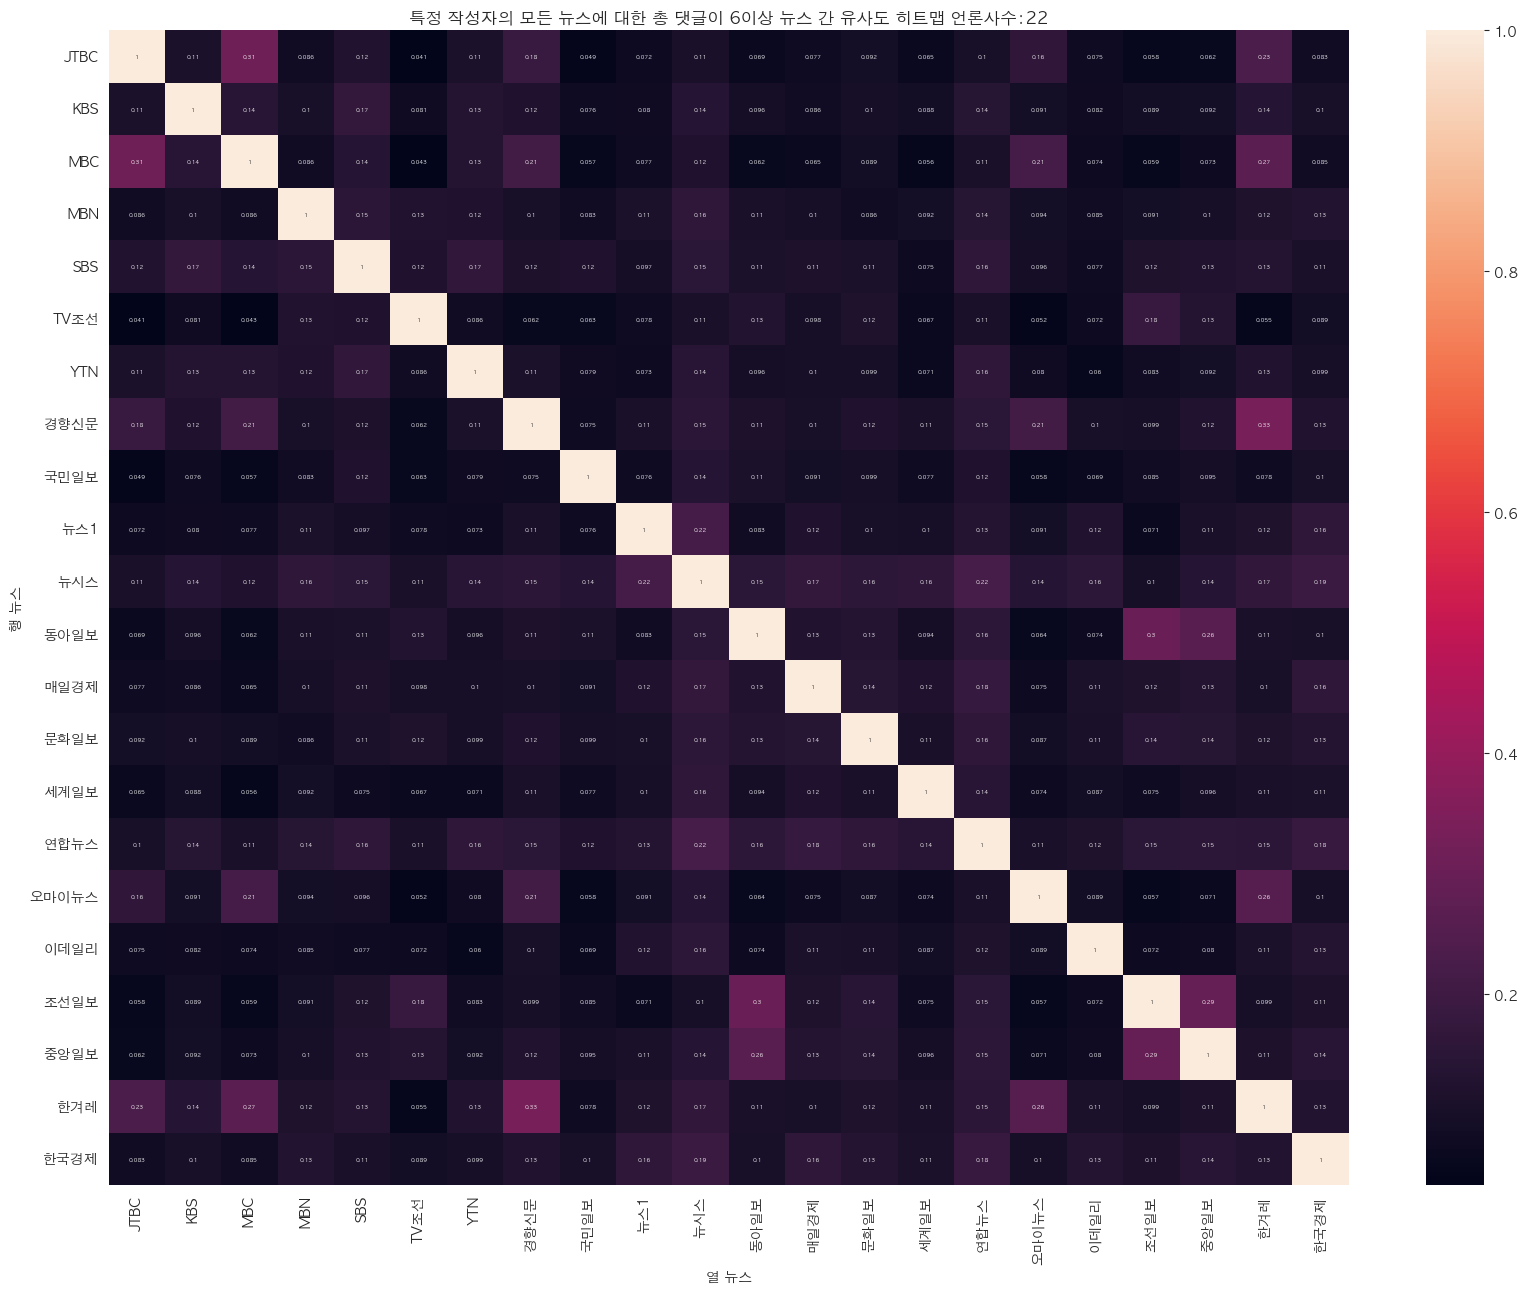

In [27]:
total_press_counts= len(df_pivot2.columns)
similarity_matrix = pd.DataFrame(
cosine_similarity(df_pivot2.T),
index=df_pivot2.columns,
columns=df_pivot2.columns
)
system = platform.system()

if system == 'Darwin':  # macOS
    font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
    plt.rcParams['font.family'] = 'AppleGothic'
elif system == 'Windows':
    font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
    plt.rcParams['font.family'] = 'NanumGothic'
elif system == 'Linux':
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # colab 포함
else:
    raise OSError("Unsupported OS")

font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
plt.figure(figsize=(20, 15))
labels = df_pivot2.columns
labels = [unicodedata.normalize('NFC', label) for label in labels]
sns.heatmap(similarity_matrix, cmap="rocket"
            , xticklabels=labels, yticklabels=labels, annot=True,annot_kws={"size": 4})

plt.title(f"특정 작성자의 모든 뉴스에 대한 총 댓글이 6이상 뉴스 간 유사도 히트맵 언론사수:{total_press_counts}")
plt.xlabel("열 뉴스")
plt.ylabel("행 뉴스")
plt.show()

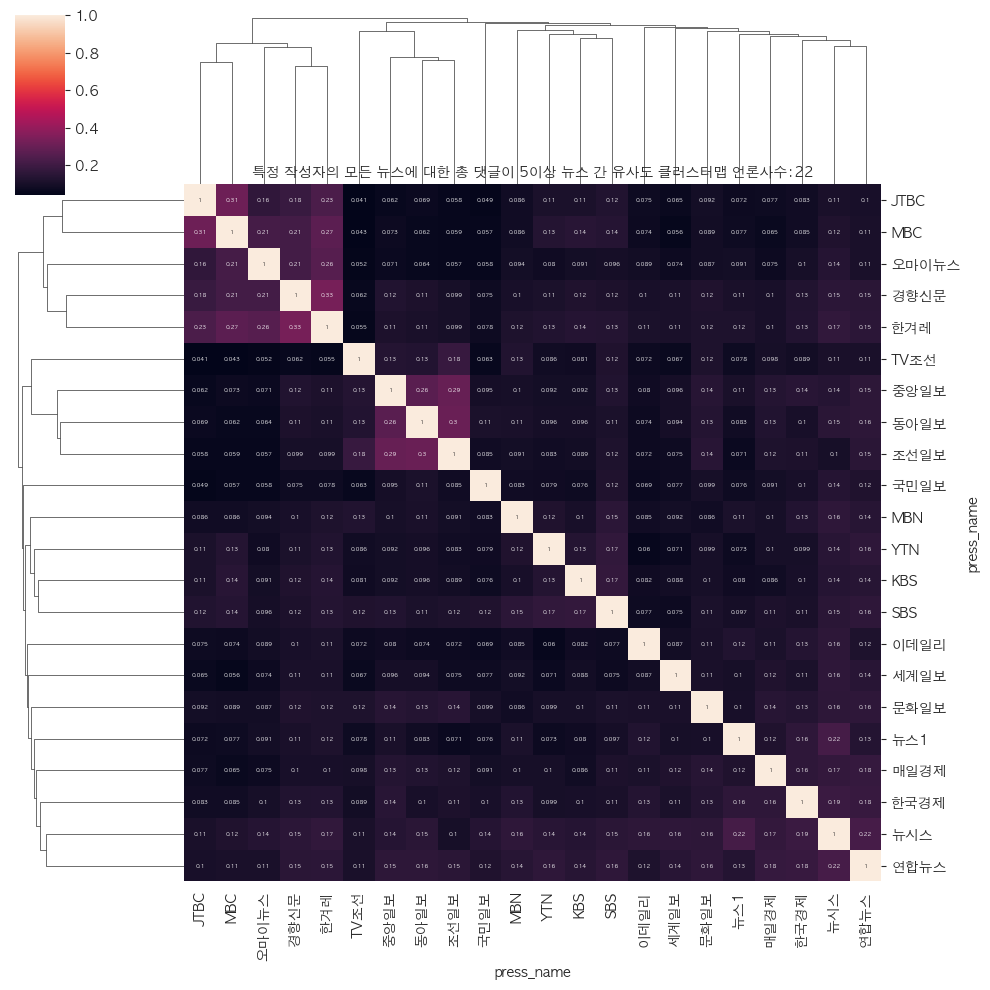

In [28]:
total_press_counts= len(df_pivot2.columns)
similarity_matrix = pd.DataFrame(
cosine_similarity(df_pivot2.T),
index=df_pivot2.columns,
columns=df_pivot2.columns
)
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()

plt.rcParams['font.family'] = font_name
labels = df_pivot2.columns
labels = [unicodedata.normalize('NFC', label) for label in labels]
cluster = sns.clustermap(similarity_matrix, cmap="rocket", annot=True,annot_kws={"size": 4}, figsize=(10, 10),xticklabels=labels, yticklabels=labels)
cluster.ax_heatmap.set_title(f"특정 작성자의 모든 뉴스에 대한 총 댓글이 5이상 뉴스 간 유사도 클러스터맵 언론사수:{total_press_counts}", fontproperties=font_prop)

plt.show()

In [ ]:
system = platform.system()

if system == 'Darwin':  # macOS
    font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
elif system == 'Windows':
    font_path = 'C:/Windows/Fonts/malgun.ttf'
elif system == 'Linux':
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # colab 포함
else:
    raise OSError("Unsupported OS")
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
for i in  [3,5,8,13,21,25,30,33,35]:

    df_pivot3 = df_pivot[df_pivot.sum(axis=1) > i]
    total_press_counts= len(df_pivot3.columns)
    similarity_matrix = pd.DataFrame(
    cosine_similarity(df_pivot3.T),
    index=df_pivot3.columns,
    columns=df_pivot3.columns
    )
    # font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
    # font_prop = fm.FontProperties(fname=font_path)
    # font_name = font_prop.get_name()

    plt.rcParams['font.family'] = font_name
    labels = df_pivot3.columns
    labels = [unicodedata.normalize('NFC', label) for label in labels]
    cluster = sns.clustermap(similarity_matrix, cmap="rocket", annot=True,annot_kws={"size": 4}, figsize=(10, 10),xticklabels=labels, yticklabels=labels)
    cluster.ax_heatmap.set_title(f"특정 작성자의 모든 뉴스에 대한 총 댓글이 {i} 이상 뉴스 간 유사도 클러스터맵 언론사수:{total_press_counts}", fontproperties=font_prop)

    plt.show()


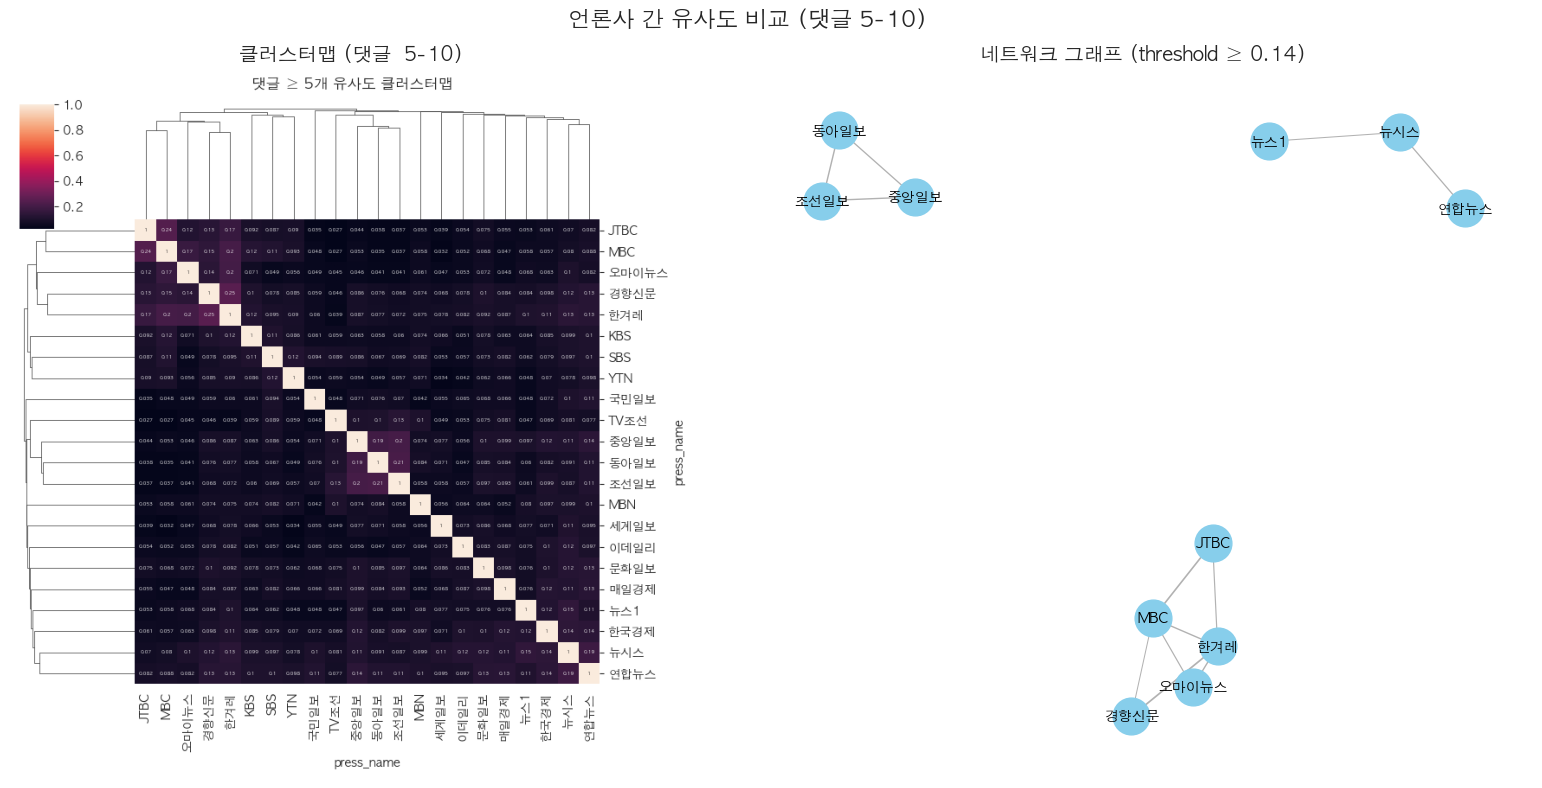

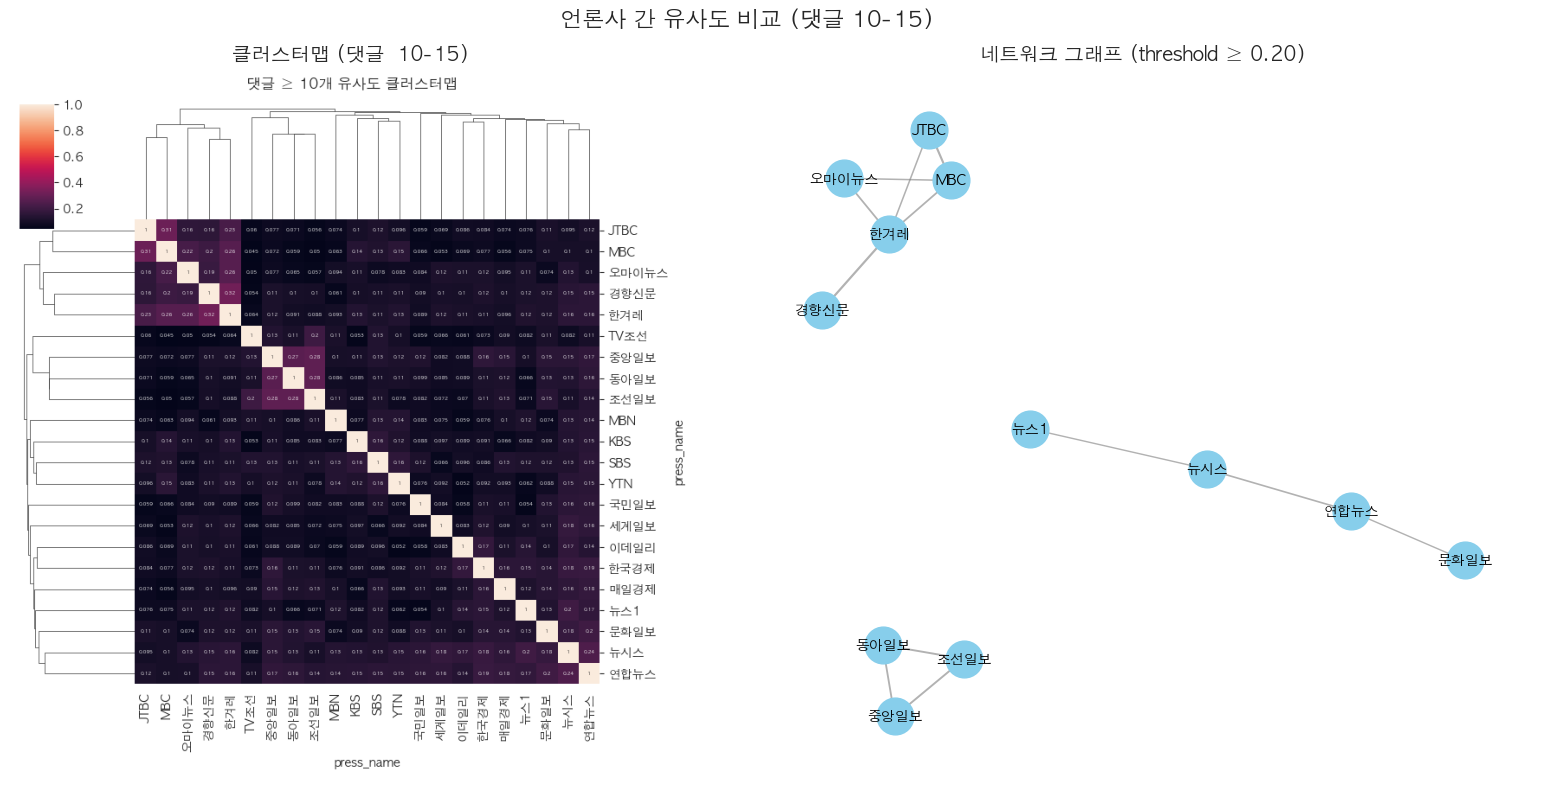

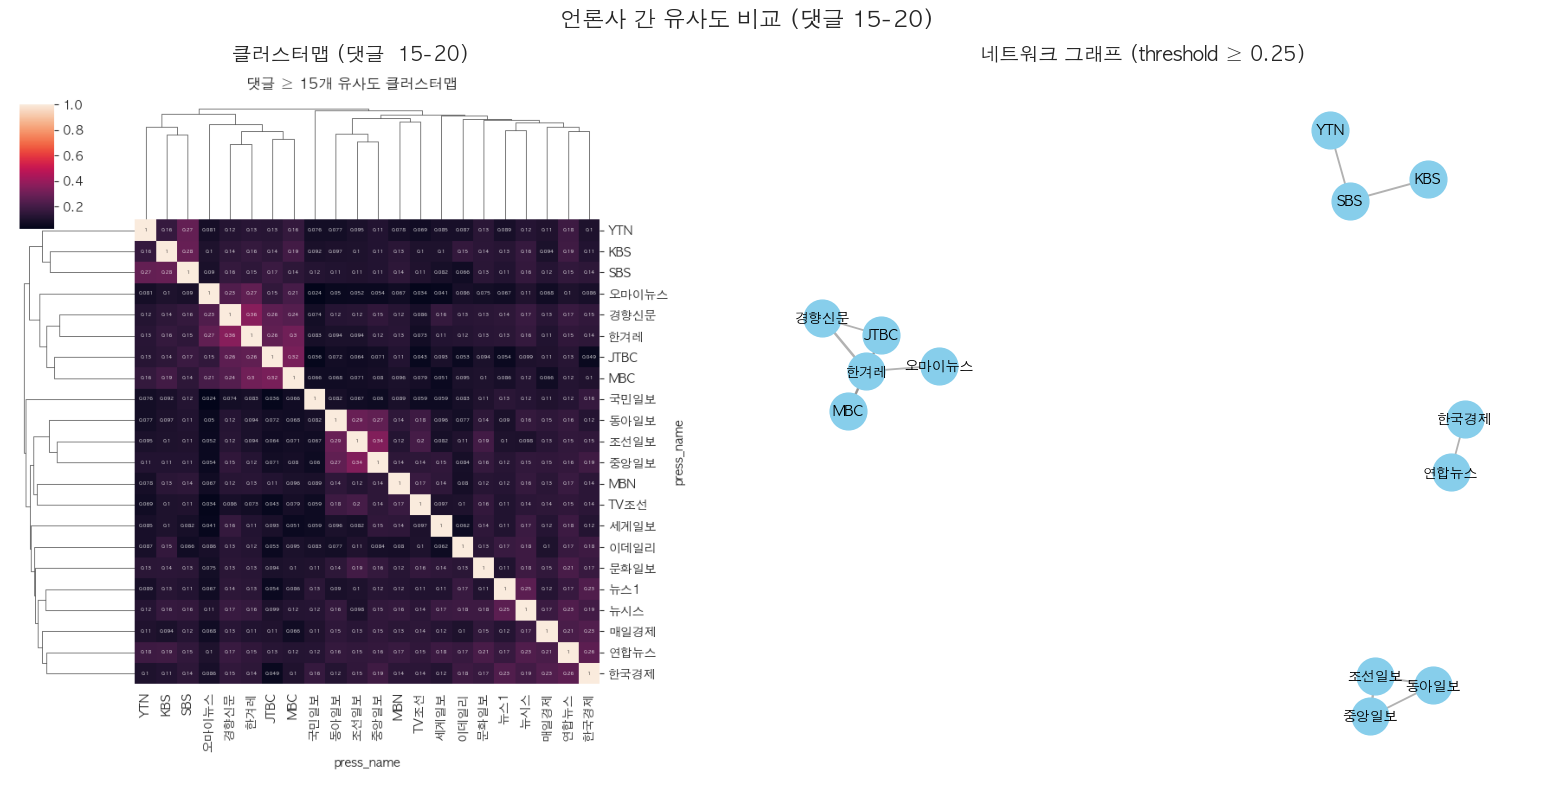

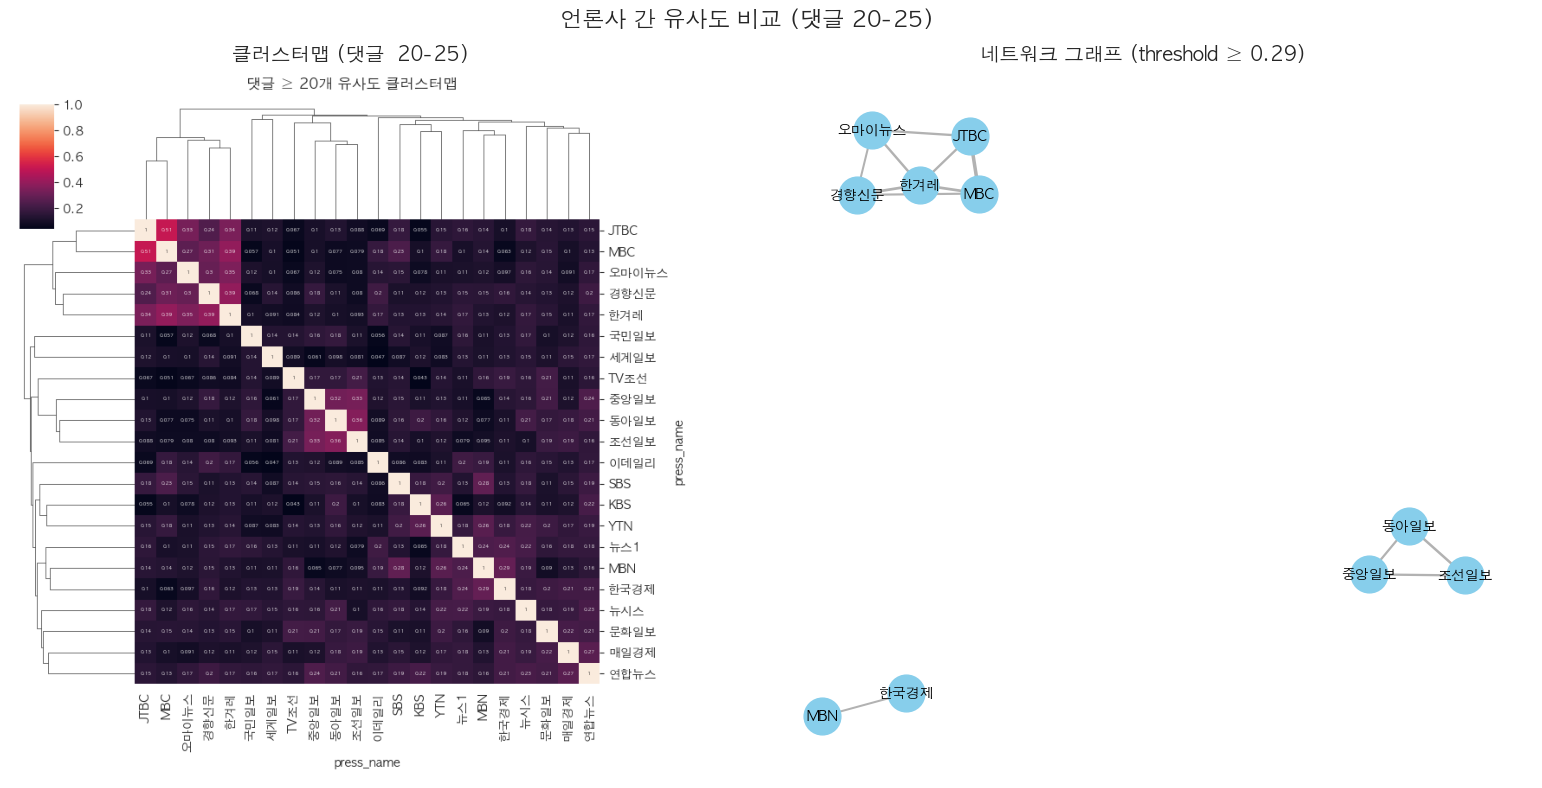

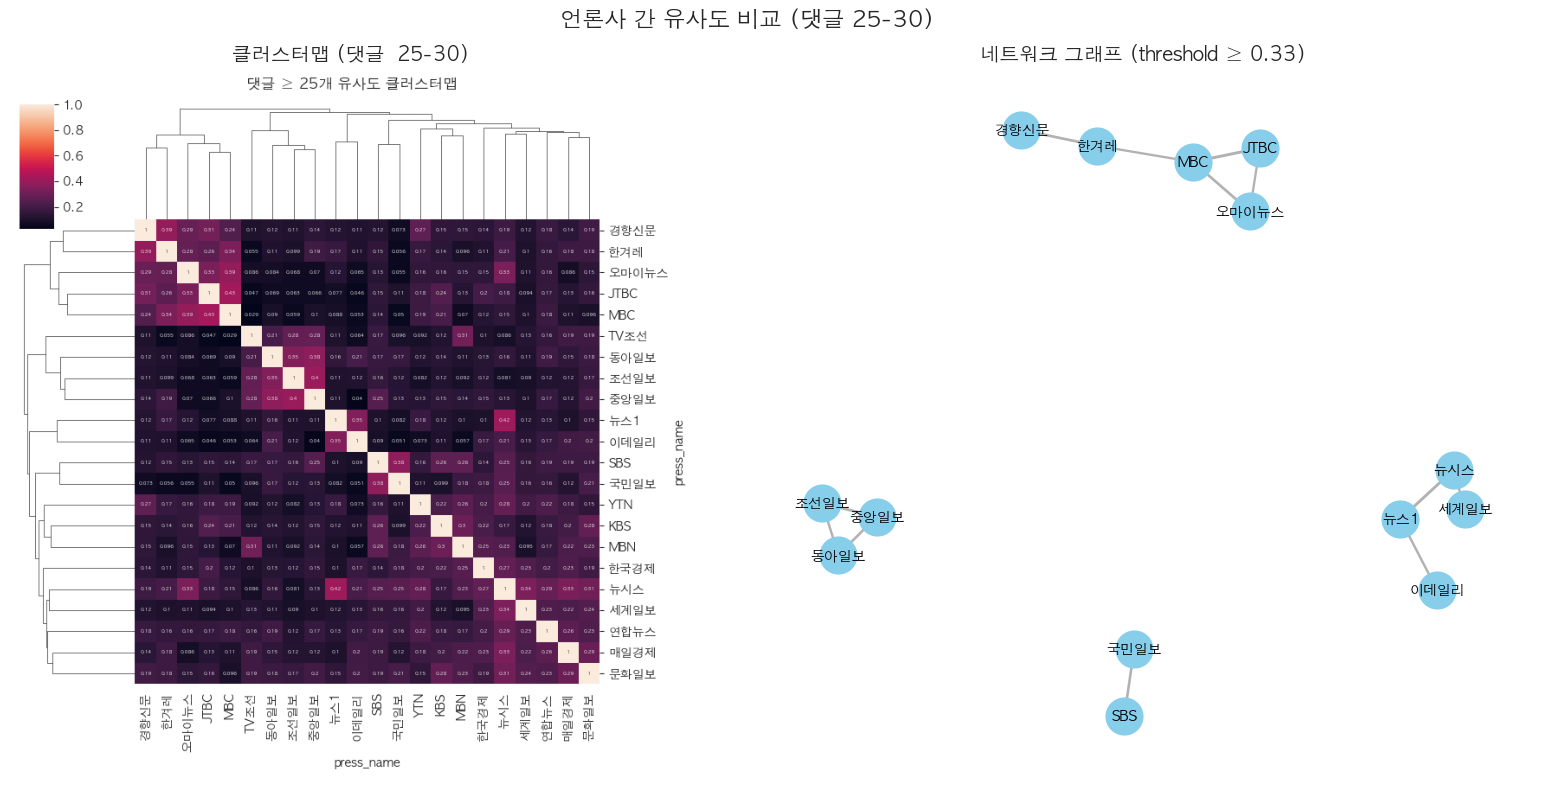

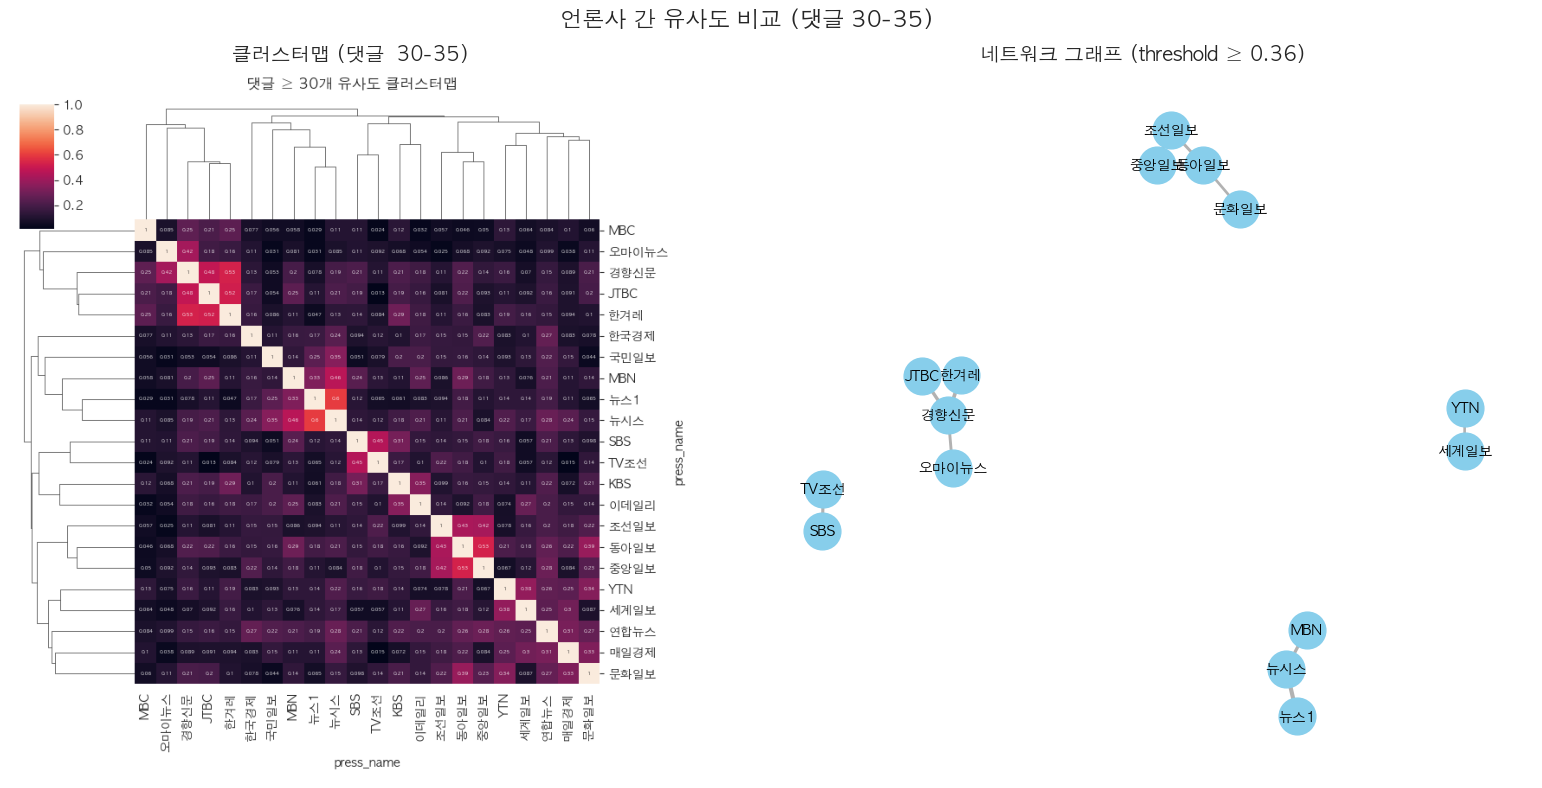

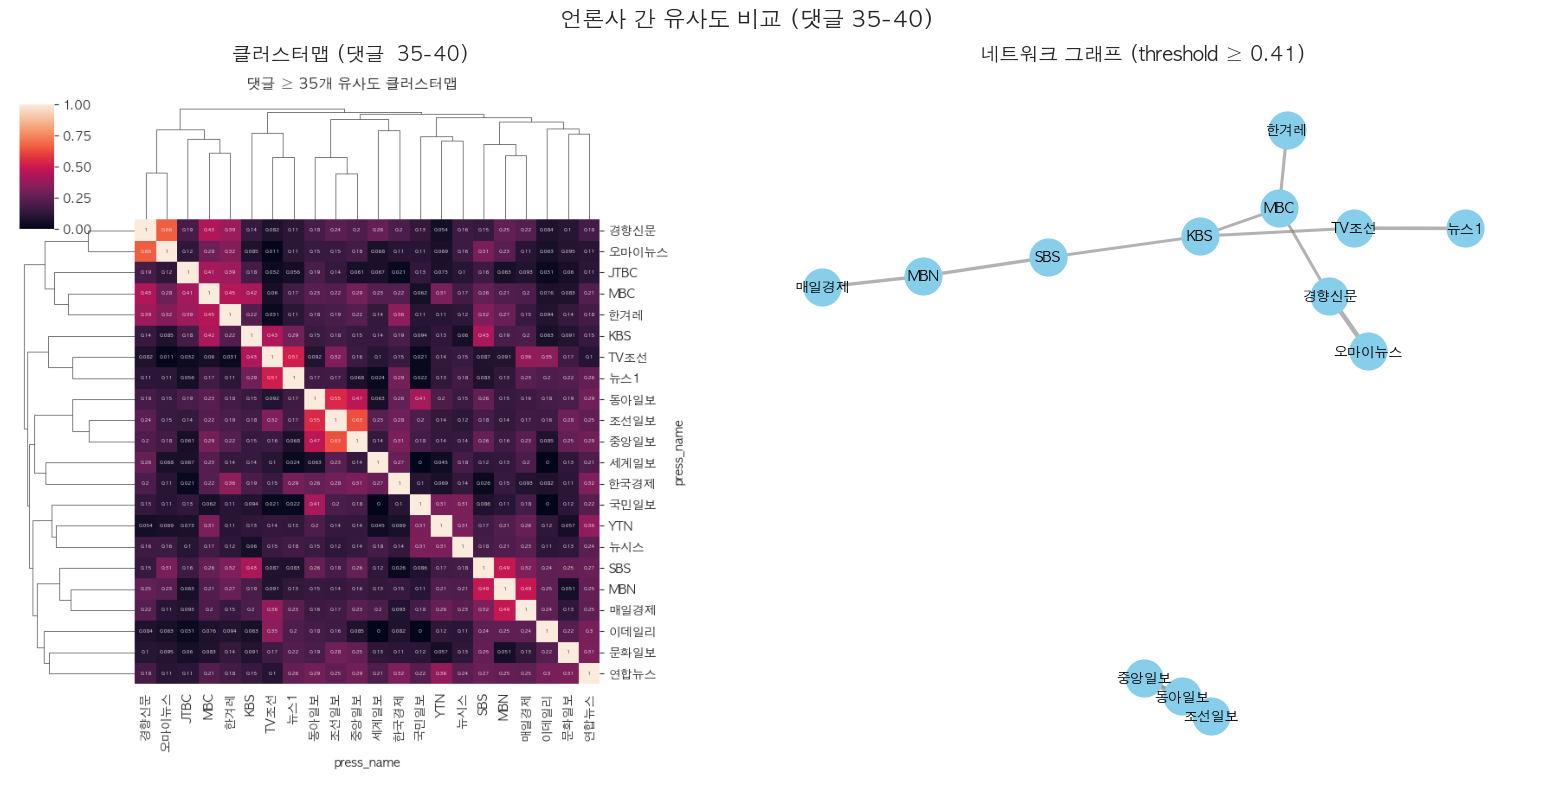

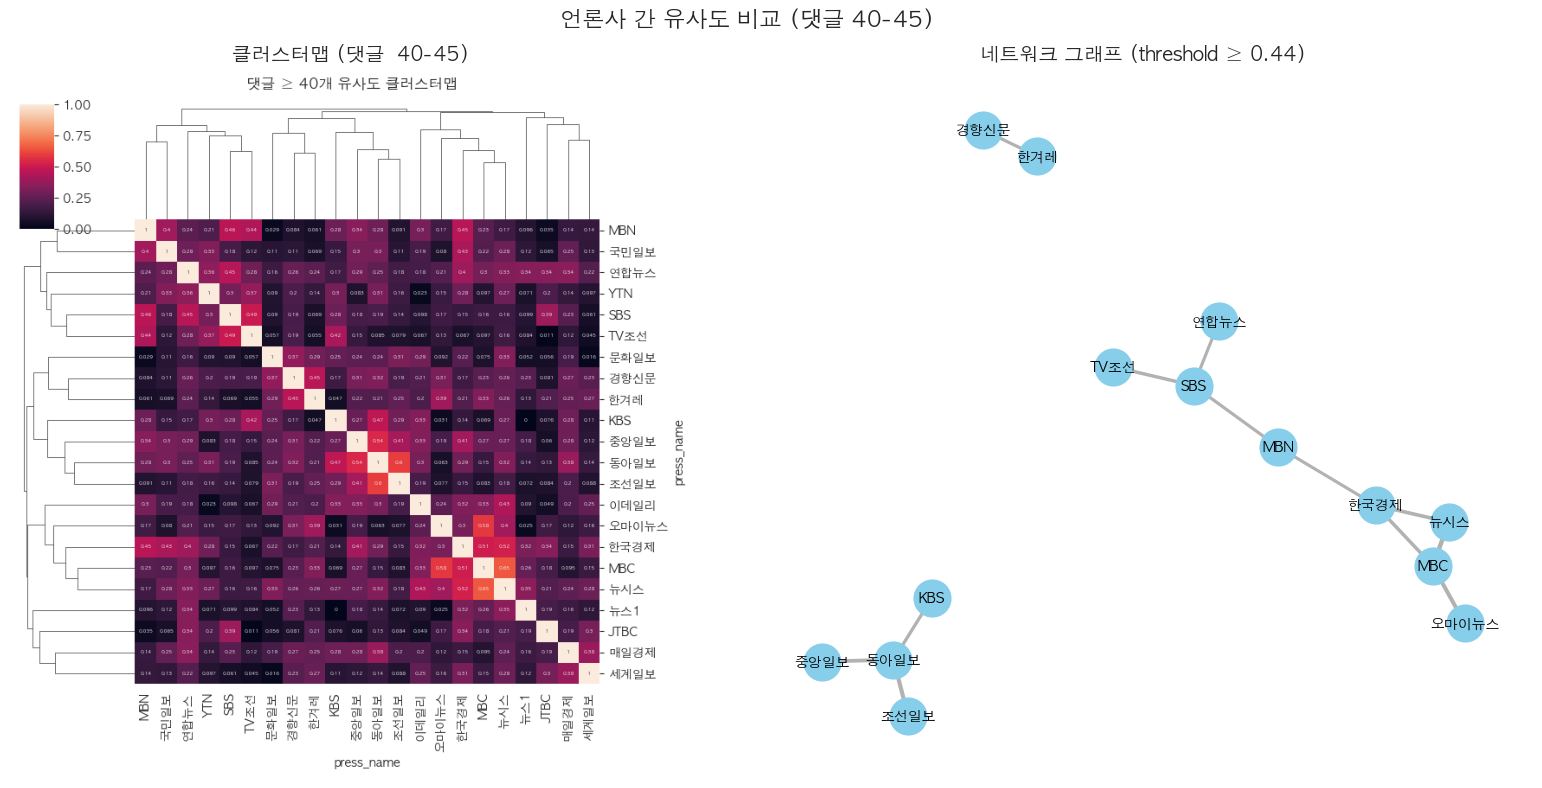

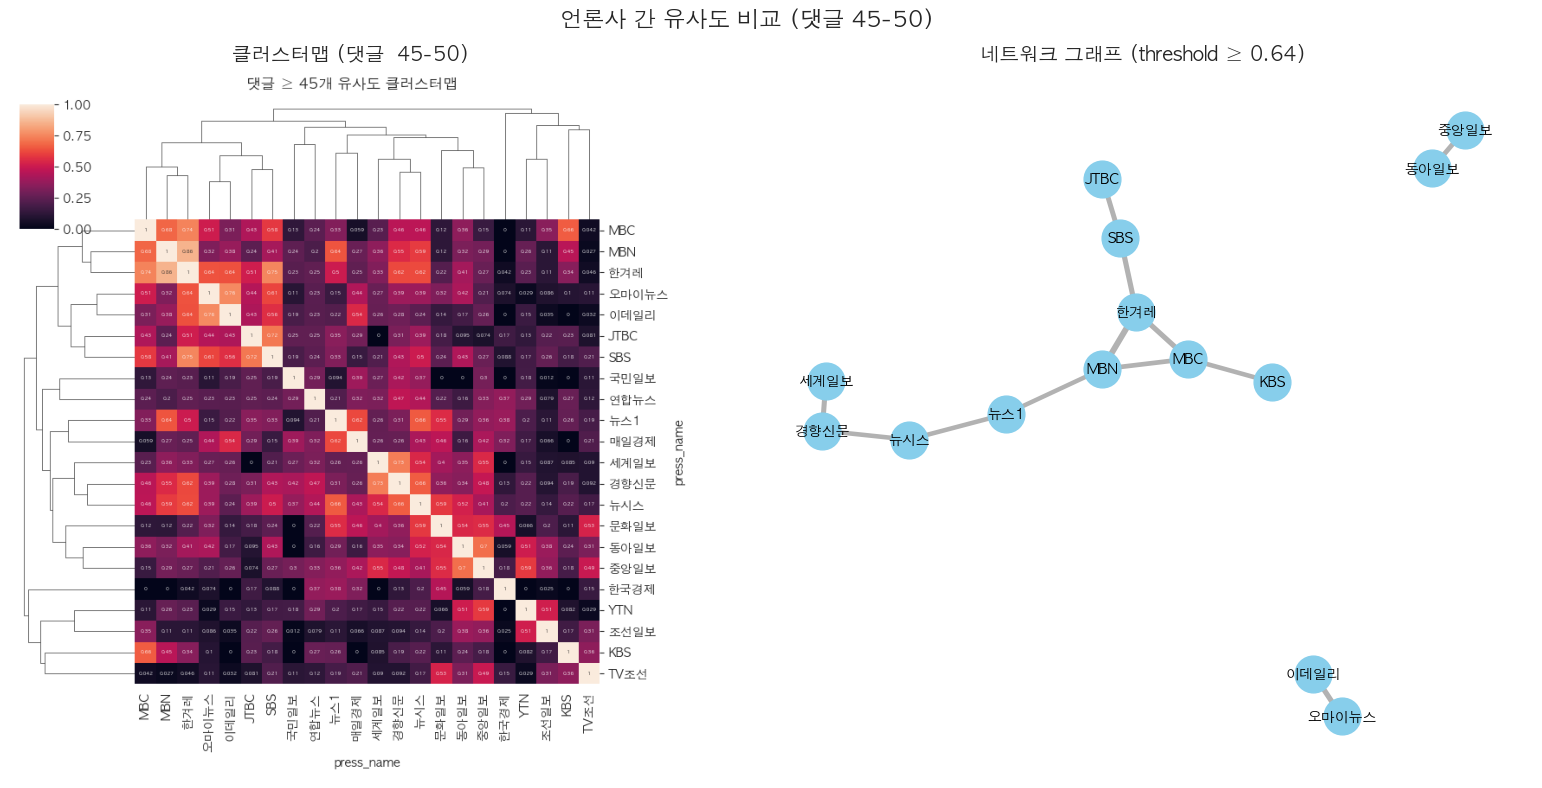

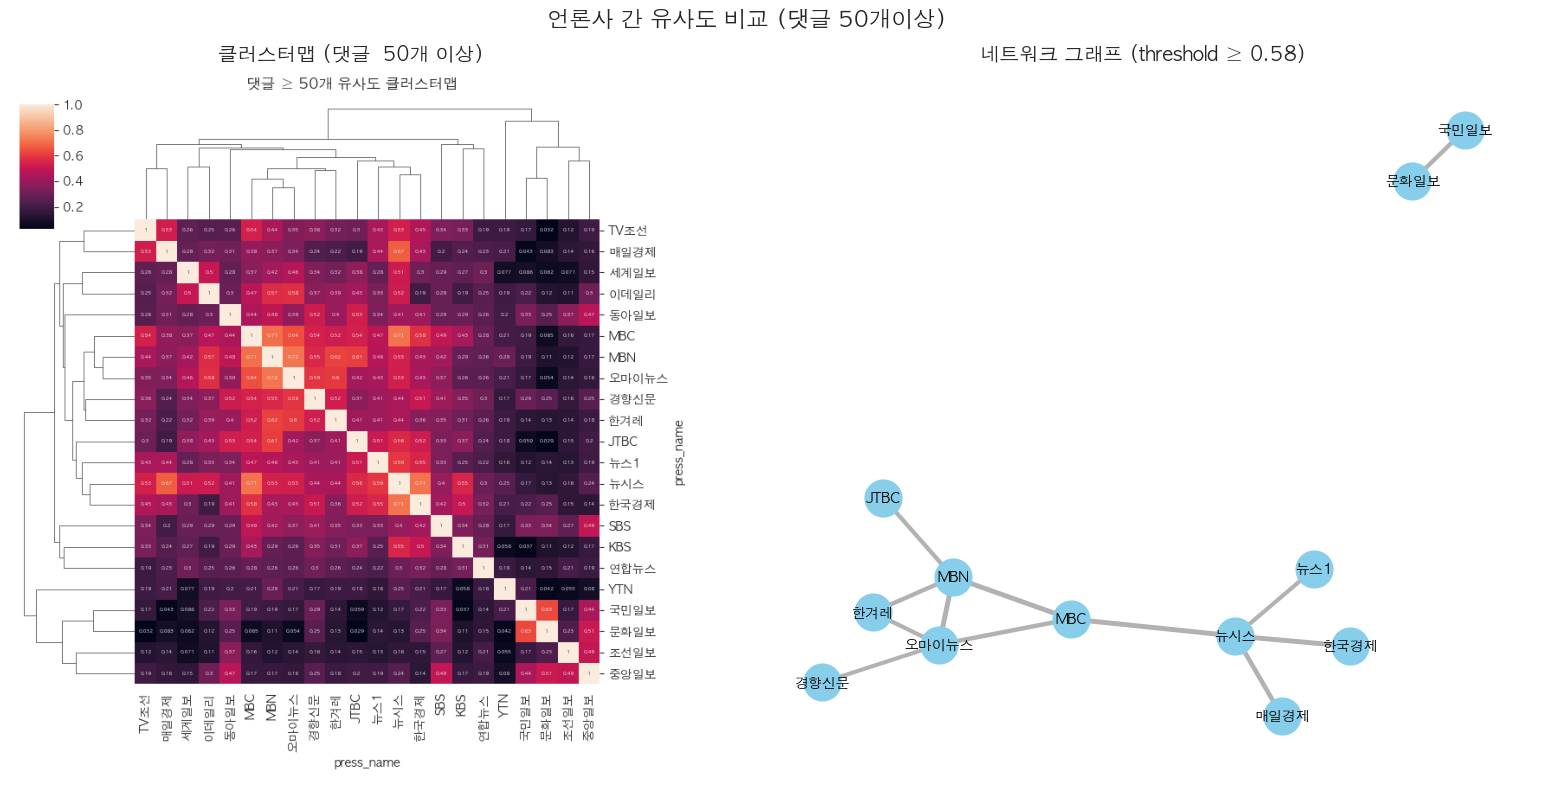

In [29]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import networkx as nx
import numpy as np
import pandas as pd
import unicodedata
import os
comment_dup_list=[5,10,15,20,25,30,35,40,45,50]
# comment_dup_list=[3, 5, 8, 13, 21, 25, 30, 35,40]
count1=0
for s in comment_dup_list:
    count1+=1

    # df_pivot3 = df_pivot[df_pivot.sum(axis=1) > s]
    if s<comment_dup_list[-1]:
        boola = (df_pivot.sum(axis=1) > s) & (df_pivot.sum(axis=1)<comment_dup_list[count1])
        df_pivot3 = df_pivot[boola]
        total_press_counts = len(df_pivot3.columns)
    else:
        df_pivot3 = df_pivot[df_pivot.sum(axis=1) > s]
        total_press_counts = len(df_pivot3.columns)

    similarity = cosine_similarity(df_pivot3.T)
    similarity_df = pd.DataFrame(similarity, index=df_pivot3.columns, columns=df_pivot3.columns)
    labels = df_pivot3.columns
    labels = [unicodedata.normalize('NFC', label) for label in labels]
    # 🔵 클러스터맵 저장
    cluster = sns.clustermap(
        similarity_df,
        cmap="rocket",
        annot=True,
        annot_kws={"size": 4},
        xticklabels=labels,
        yticklabels=labels,
        figsize=(8, 8)
    )
    cluster.fig.suptitle(f"댓글 ≥ {s}개 유사도 클러스터맵", y=1.02)
    cluster.savefig("cluster_tmp.png")
    plt.close(cluster.fig)  # 클러스터맵 figure 닫기

    # 🔴 네트워크 생성
    threshold = np.percentile(similarity_df.values[np.triu_indices_from(similarity_df, k=1)], 95)
    G = nx.Graph()

    for press in similarity_df.columns:
        G.add_node(press)

    for i in similarity_df.columns:
        for j in similarity_df.columns:
            if i != j and similarity_df.loc[i, j] >= threshold:
                G.add_edge(i, j, weight=similarity_df.loc[i, j])

    G.remove_nodes_from(list(nx.isolates(G)))
    pos = nx.spring_layout(G, seed=42)
    edges = G.edges(data=True)
    weights = [d['weight'] * 5 for (_, _, d) in edges]

    # ⚫ 두 그래프 병렬 출력
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    # font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
    # font_prop = fm.FontProperties(fname=font_path)
    system = platform.system()

    if system == 'Darwin':  # macOS
        font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
    elif system == 'Windows':
        font_path = 'C:/Windows/Fonts/malgun.ttf'
    elif system == 'Linux':
        font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # colab 포함
    else:
        raise OSError("Unsupported OS")

    font_prop = fm.FontProperties(fname=font_path)
    font_name = font_prop.get_name()


    # 2. 전역 설정 (안 해도 되지만, 혹시 모르니 함께 설정)
    plt.rcParams['font.family'] = font_name
    plt.rcParams['axes.unicode_minus'] = False
    # 1️⃣ 클러스터맵 이미지 삽입
    cluster_img = plt.imread("cluster_tmp.png")
    axes[0].imshow(cluster_img)
    axes[0].axis('off')
    if s<comment_dup_list[-1]:
        axes[0].set_title(f"클러스터맵 (댓글  {s}-{s+5})", fontsize=14)
    else:
        axes[0].set_title(f"클러스터맵 (댓글  {s}개 이상)", fontsize=14)

    # 2️⃣ 네트워크
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', ax=axes[1])
    nx.draw_networkx_edges(G, pos, width=weights, edge_color="gray", alpha=0.6, ax=axes[1])
    nx.draw_networkx_labels(
        G,
        pos,
        labels={n: unicodedata.normalize('NFC', n) for n in G.nodes()},
        font_size=10,
        ax=axes[1], font_family=font_name
    )
    axes[1].set_title(f"네트워크 그래프 (threshold ≥ {threshold:.2f})", fontsize=14)
    axes[1].axis('off')
    if s<comment_dup_list[-1]:
        plt.suptitle(f"언론사 간 유사도 비교 (댓글 {s}-{s+5})", fontsize=16)
    else:
        plt.suptitle(f"언론사 간 유사도 비교 (댓글 {s}개이상)", fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
# system = platform.system()
# if system == 'Darwin':  # macOS
#     font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
# elif system == 'Windows':
#     font_path = 'C:/Windows/Fonts/malgun.ttf'
# elif system == 'Linux':
#     font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # colab 포함
# else:
#     raise OSError("Unsupported OS")
# font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
# font_prop = fm.FontProperties(fname=font_path)
# font_name = font_prop.get_name()
# comment_dup_list=[5,10,15,20,25,30,35,40,45,50]
#
# count1=0
# for s in comment_dup_list:
#     count1+=1
#
#     df_pivot3 = df_pivot[df_pivot.sum(axis=1) > s]
#
#     total_press_counts = len(df_pivot3.columns)
#
#     similarity = cosine_similarity(df_pivot3.T)
#     similarity_df = pd.DataFrame(similarity, index=df_pivot3.columns, columns=df_pivot3.columns)
#     labels = df_pivot3.columns
#     labels = [unicodedata.normalize('NFC', label) for label in labels]
#     # 🔵 클러스터맵 저장
#     cluster = sns.clustermap(
#         similarity_df,
#         cmap="rocket",
#         annot=True,
#         annot_kws={"size": 4},
#         xticklabels=labels,
#         yticklabels=labels,
#         figsize=(8, 8)
#     )
#     cluster.fig.suptitle(f"댓글 ≥ {s}개 유사도 클러스터맵", y=1.02)
#     cluster.savefig("cluster_tmp.png")
#     plt.close(cluster.fig)  # 클러스터맵 figure 닫기
#
#     # 🔴 네트워크 생성
#     threshold = np.percentile(similarity_df.values[np.triu_indices_from(similarity_df, k=1)], 95)
#     G = nx.Graph()
#
#     for press in similarity_df.columns:
#         G.add_node(press)
#
#     for i in similarity_df.columns:
#         for j in similarity_df.columns:
#             if i != j and similarity_df.loc[i, j] >= threshold:
#                 G.add_edge(i, j, weight=similarity_df.loc[i, j])
#
#     G.remove_nodes_from(list(nx.isolates(G)))
    # pos = nx.spring_layout(G, seed=42)
    # edges = G.edges(data=True)
    # weights = [d['weight'] * 5 for (_, _, d) in edges]
    #
    # # ⚫ 두 그래프 병렬 출력
    # fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    #
    #
    # system = platform.system()
    #
    #
    #
    # # 2. 전역 설정 (안 해도 되지만, 혹시 모르니 함께 설정)
    # plt.rcParams['font.family'] = font_name
    # plt.rcParams['axes.unicode_minus'] = False
    # # 1️⃣ 클러스터맵 이미지 삽입
    # cluster_img = plt.imread("cluster_tmp.png")
    # axes[0].imshow(cluster_img)
    # axes[0].axis('off')
    # axes[0].set_title(f"클러스터맵 (댓글  {s}개 이상)", fontsize=14)
    #
    # # 2️⃣ 네트워크
    # nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', ax=axes[1])
    # nx.draw_networkx_edges(G, pos, width=weights, edge_color="gray", alpha=0.6, ax=axes[1])
    # nx.draw_networkx_labels(
    #     G,
    #     pos,
    #     labels={n: unicodedata.normalize('NFC', n) for n in G.nodes()},
    #     font_size=10,
    #     ax=axes[1], font_family=font_name
    # )
    # axes[1].set_title(f"네트워크 그래프 (threshold ≥ {threshold:.2f})", fontsize=14)
    # axes[1].axis('off')
    #
    # plt.suptitle(f"언론사 간 유사도 비교 (댓글 {s}개 이상)", fontsize=16)
    # plt.tight_layout()
    # plt.show()

In [ ]:

# for s in [3,5,8,13,21,25,30,33,35]:
#
#     df_pivot3 = df_pivot[df_pivot.sum(axis=1) > s]
#     news_vectors = df_pivot3.T
#
# # 유사도 행렬 계산
#     similarity = cosine_similarity(news_vectors)
#     similarity_df = pd.DataFrame(similarity, index=news_vectors.index, columns=news_vectors.index)
#     G = nx.Graph()
#
#     # threshold = min(0.2 + (s / 60) ** 3, 0.6) # 유사도 기준 설정
#     threshold = np.percentile(
#     similarity_df.values[np.triu_indices_from(similarity_df, k=1)],95)
#
#     labels = df_pivot3.columns
#     labels = [unicodedata.normalize('NFC', label) for label in labels]
#
#     for press in labels:
#         G.add_node(press)
#
#     # 엣지 추가 (유사도 기반)
#     for i in similarity_df.columns:
#         for j in similarity_df.columns:
#             if i != j and similarity_df.loc[i, j] >= threshold:
#                 G.add_edge(i, j, weight=similarity_df.loc[i, j])
#
#
#     # 1. AppleGothic 폰트 설정
#     # font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
#     # font_prop = fm.FontProperties(fname=font_path)
#     font_path = "../src/NanumGothic.ttf"  # 실제 경로 확인 필요
#     font_prop = fm.FontProperties(fname=font_path)
#     font_name = font_prop.get_name()
#
#     # 2. 전역 설정 (안 해도 되지만, 혹시 모르니 함께 설정)
#     plt.rcParams['font.family'] = font_name
#     plt.rcParams['axes.unicode_minus'] = False

    ## 3. 네트워크 그리기
    # plt.figure(figsize=(12, 10))
    #
    # pos = nx.spring_layout(G, seed=42)
    #
    # edges = G.edges(data=True)
    # weights = [d['weight']*5 for (_, _, d) in edges]
    # G.remove_nodes_from(list(nx.isolates(G)))
    # nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
    # nx.draw_networkx_edges(G, pos, width=weights, edge_color="black",alpha=0.6)
    # nx.draw_networkx_labels(G, pos, labels={n: unicodedata.normalize('NFC', n) for n in G.nodes()},
    #                         font_size=10, font_family=font_name)
    #
    # plt.title(f"뉴스 간 유사도 네트워크 댓글{s}개 이상 threshold={threshold}", fontproperties=font_prop)
    # plt.axis('off')
    # plt.tight_layout()
    # plt.show()

In [ ]:
# from umap import UMAP
# for s in [3,5,8,13,21,25,30,33,35]:
#
#     df_pivot3 = df_pivot[df_pivot.sum(axis=1) > s]
#     news_vectors = df_pivot3.T
#     reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
#     embedding = reducer.fit_transform(news_vectors)
#
#     # 라벨 정리
#     labels = [unicodedata.normalize('NFC', label) for label in news_vectors.index]
#
#     # 시각화
#     plt.figure(figsize=(10, 8))
#     for i, label in enumerate(labels):
#         plt.scatter(embedding[i, 0], embedding[i, 1])
#         plt.text(embedding[i, 0]+0.01, embedding[i, 1]+0.01, label, fontsize=9)
#
#     plt.title(f"UMAP 기반 뉴스 댓글 유사도 댓글수 {s}이상")
#     plt.xticks([]); plt.yticks([]); plt.box(False)
#     plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# import umap
# import unicodedata
#
# for s in [25]:
#     print(s)
#     df_pivot3 = df_pivot[df_pivot.sum(axis=1) > s]
#     news_vectors = df_pivot3.T
#     reducer = umap.UMAP(
#     n_components=2,
#     metric='cosine',
#     n_neighbors=50,      # 작게
#     min_dist=1,       # 멀게
#     random_state=42
# )
#     embedding = reducer.fit_transform(news_vectors)
#     labels = [unicodedata.normalize('NFC', label) for label in news_vectors.index]
#
#     # 클러스터링
#     n_clusters = min(6, len(embedding))
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     cluster_labels = kmeans.fit_predict(embedding)
#     colors = plt.cm.tab10(cluster_labels)
#
#     # 시각화
#     plt.figure(figsize=(10, 8))
#     for i, (x, y) in enumerate(embedding):
#         plt.scatter(x, y, color=colors[i])
#         plt.text(x + 0.01, y + 0.01, labels[i], fontsize=9)
#
#     plt.title(f"UMAP 뉴스 유사도 (댓글 수 ≥ {s}) - KMeans 클러스터링만 적용")
#     plt.xticks([]); plt.yticks([]); plt.box(False)
#     plt.tight_layout()
#     plt.show()

25


/Users/jeongseonghyeon/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


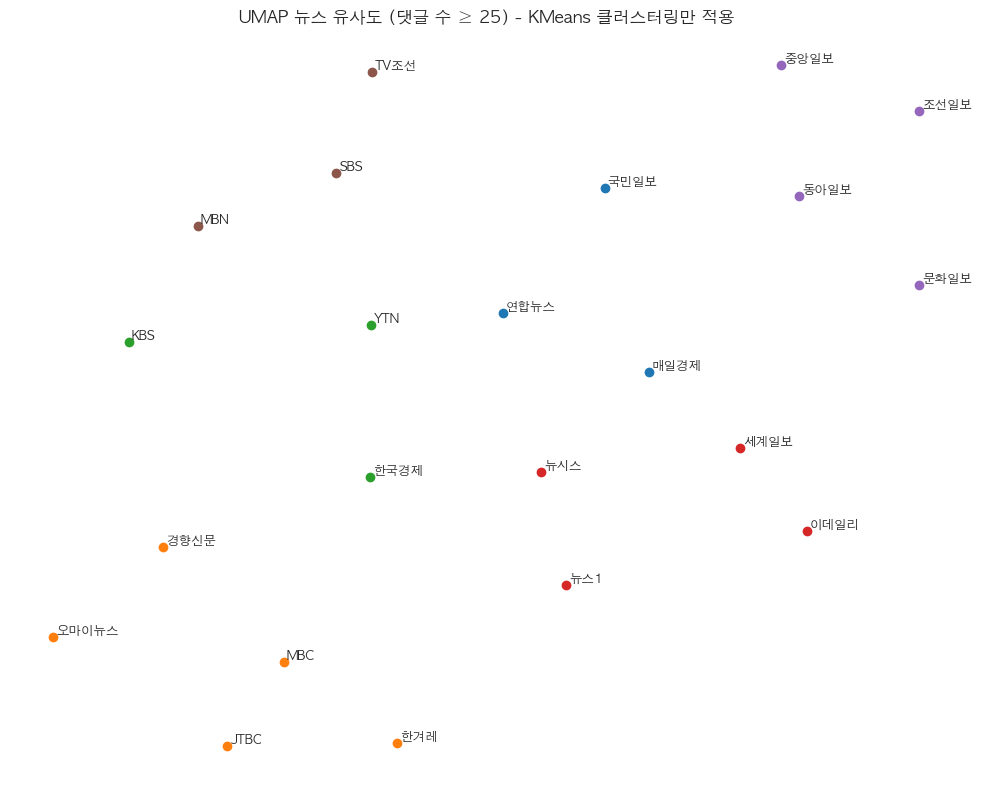

In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import umap
import unicodedata

for s in [25]:
    print(s)
    df_pivot3 = df_pivot[df_pivot.sum(axis=1) > s]
    news_vectors = df_pivot3.T
    reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
    embedding = reducer.fit_transform(news_vectors)
    labels = [unicodedata.normalize('NFC', label) for label in news_vectors.index]

    # 클러스터링
    n_clusters = min(6, len(embedding))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embedding)
    colors = plt.cm.tab10(cluster_labels)

    # 시각화
    plt.figure(figsize=(10, 8))
    for i, (x, y) in enumerate(embedding):
        plt.scatter(x, y, color=colors[i])
        plt.text(x + 0.01, y + 0.01, labels[i], fontsize=9)

    plt.title(f"UMAP 뉴스 유사도 (댓글 수 ≥ {s}) - KMeans 클러스터링만 적용")
    plt.xticks([]); plt.yticks([]); plt.box(False)
    plt.tight_layout()
    plt.show()

In [78]:
from matplotlib import font_manager as fm
import matplotlib as mpl

font_path = "../src/NanumGothic.ttf"
fm.fontManager.addfont(font_path)             # ① .ttf 파일을 font manager에 추가
mpl.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()
mpl.rcParams['axes.unicode_minus'] = False

In [83]:
okt = Okt()

# 불용어
stopwords = set([
    '그리고', '그러나', '하지만', '또한', '있다', '없다', '이다', '이', '가', '은', '는',
    '을', '를', '에', '의', '도', '로', '과', '와', '한', '하다', '것', '수', '들',
    '좀', '잘', '너무', '더', '만', '까지', '처럼', '에서', '부터', '되다','국민의 힘'
])
def clean_text(text):
    tokens = okt.nouns(text)
    return ' '.join([word for word in tokens if word not in stopwords and len(word) > 1])
base_dir = "../src/news_comments"
font_path = "../src/NanumGothic.ttf"  # 한글 폰트 경로
# 한글 폰트 깨짐을 위한 해결
font_name = fm.FontProperties(fname=font_path).get_name()
font_prop = fm.FontProperties(fname=font_path)
print(font_name)
mpl.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic


In [84]:
from matplotlib import font_manager as fm

# 폰트 경로와 객체 설정
font_path = "../src/NanumGothic.ttf"  # 실제 경로 확인 필요
font_prop = fm.FontProperties(fname=font_path)

def draw_wordcloud(text, title, top_n=30):
    word_list = text.split()
    word_counts = Counter(word_list)
    most_common = word_counts.most_common(top_n)

    print(f"\n [Top {top_n} 단어 - {title}]\n")
    for word, count in most_common:
        print(f"{word:<10} : {count}")

    # WordCloud에 직접 한글 폰트 지정
    wordcloud = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=400
    ).generate_from_frequencies(dict(most_common))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    # 제목에도 한글 폰트 지정
    plt.title(title, fontproperties=font_prop)
    plt.tight_layout()
    plt.show()

2025-02-02_아이뉴스24_'9인 체제 尹 탄핵심판' 여부 오늘 결론.csv- 4/4                                                                                                                                                                                                
📌 [Top 30 단어 - 보수 언론 (조중동) 댓글 워드클라우드]

탄핵         : 22992
국민         : 14044
대통령        : 10422
나라         : 10384
민주당        : 9543
이재명        : 9347
내란         : 8820
헌재         : 6567
대한민국       : 6492
윤석열        : 5694
사람         : 4676
계엄         : 4042
국가         : 3965
죄명         : 3580
이제         : 3555
정치         : 3487
생각         : 3406
기각         : 3196
좌파         : 3190
집회         : 3093
인간         : 3075
진짜         : 2994
지금         : 2952
반대         : 2856
재판         : 2789
보수         : 2724
세력         : 2522
선동         : 2435
국회         : 2421
자유         : 2235


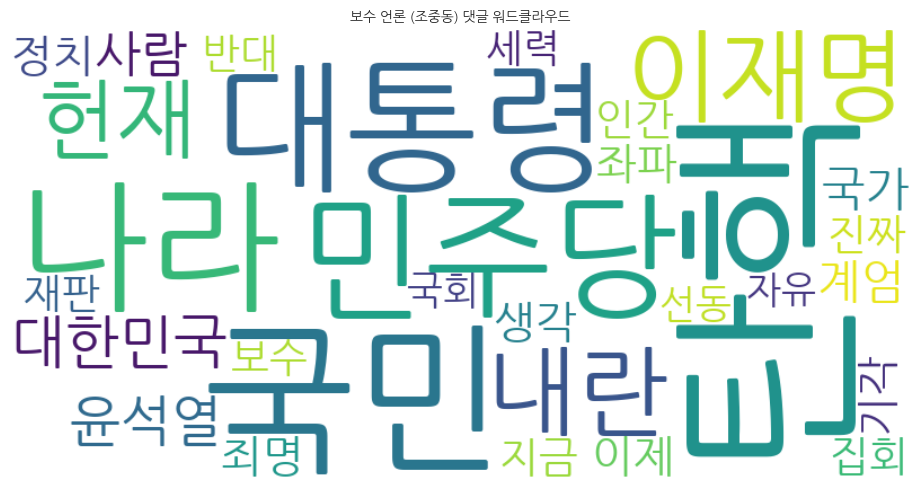


📌 [Top 30 단어 - 진보 언론 (한경오 JTBC MBC) 댓글 워드클라우드]

국민         : 15329
내란         : 13813
탄핵         : 13055
대통령        : 8982
나라         : 7943
윤석열        : 7912
사람         : 5885
헌재         : 5844
계엄         : 5361
인간         : 5117
대한민국       : 4559
진짜         : 4377
생각         : 4227
민주당        : 4052
이재명        : 3623
사형         : 3272
정신         : 3148
선동         : 3132
이제         : 3071
국가         : 3034
정치         : 2971
지금         : 2874
국힘         : 2874
파면         : 2757
소리         : 2671
그냥         : 2488
극우         : 2405
기각         : 2305
헌법         : 2146
하나         : 2124


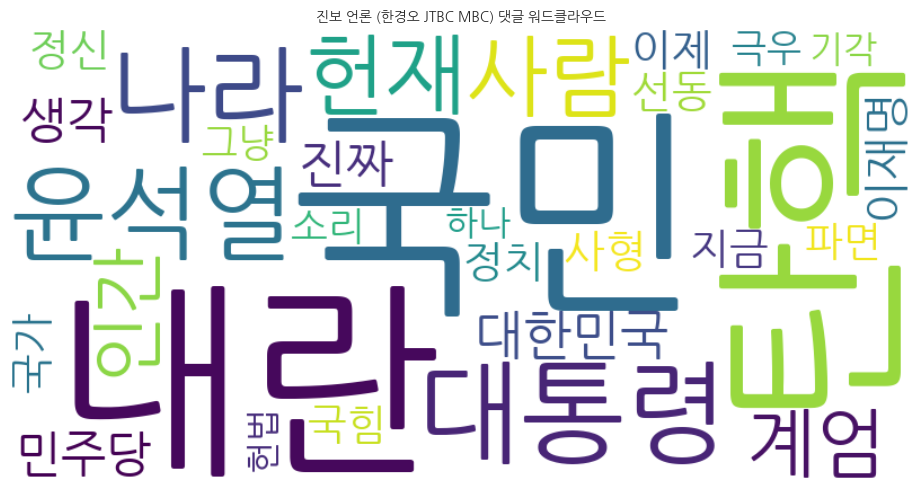


📌 [Top 30 단어 - 중도 언론(연합뉴스, 뉴시스, 뉴스1) 댓글 워드클라우드]

탄핵         : 46084
국민         : 31751
대통령        : 24093
내란         : 21736
나라         : 18477
민주당        : 16595
헌재         : 15712
윤석열        : 14765
이재명        : 12839
사람         : 11811
계엄         : 11636
대한민국       : 11251
국가         : 8613
생각         : 7942
기각         : 7439
정치         : 7368
지금         : 7052
진짜         : 7034
국회         : 6883
반대         : 6759
인간         : 6572
집회         : 6330
재판         : 6099
이제         : 6065
헌법         : 5979
선동         : 5803
좌파         : 5667
파면         : 5498
그냥         : 5266
세력         : 5189


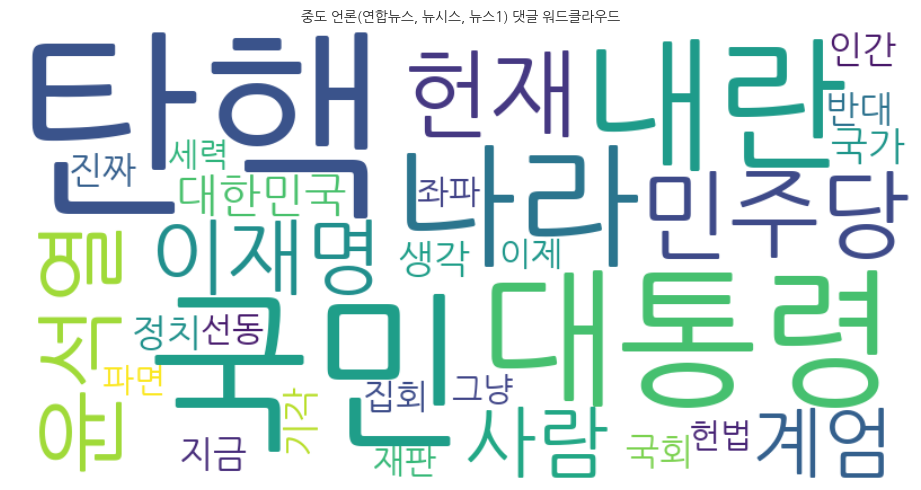


📌 [Top 30 단어 - 기타 언론 댓글 워드클라우드]

탄핵         : 25882
국민         : 21633
대통령        : 15062
내란         : 14254
나라         : 12201
민주당        : 9715
사람         : 9614
윤석열        : 8992
이재명        : 7988
헌재         : 7746
대한민국       : 7362
계엄         : 7296
생각         : 6271
정치         : 5892
인간         : 5353
진짜         : 5181
국가         : 4967
반대         : 4618
집회         : 4598
지금         : 4592
그냥         : 4368
선동         : 4214
이제         : 4051
정신         : 3970
국힘         : 3830
좌파         : 3820
재판         : 3580
보수         : 3506
극우         : 3448
찬성         : 3358


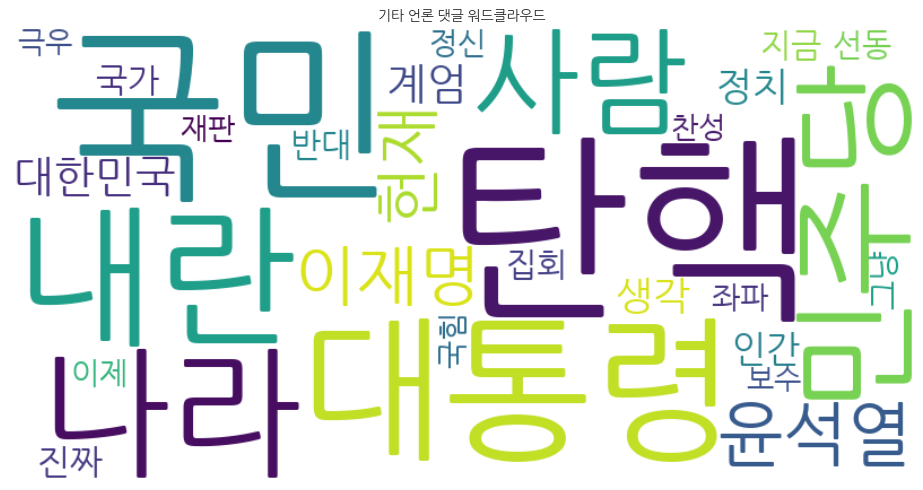

In [86]:
group_a = {unicodedata.normalize("NFC", name) for name in ['조선일보', '중앙일보', '동아일보']}
group_b = {unicodedata.normalize("NFC", name) for name in ['한겨레', 'JTBC', 'MBC','오마이뉴스']}
group_c = {unicodedata.normalize("NFC", name) for name in ['연합뉴스','뉴시스','뉴스1']}
# 댓글 저장할 dict
group_comments = {
    '보수 언론 (조중동)': [],
    '진보 언론 (한경오 JTBC MBC)': [],
    '중도 언론(연합뉴스, 뉴시스, 뉴스1)':[],
    '기타 언론': []
}

# === 그룹별로 댓글 수집 ===
for press in os.listdir(base_dir):
    press_path = os.path.join(base_dir, press)
    press = unicodedata.normalize("NFC", press)
    print(f"\r{press_path}                     " ,end="", flush=True)

    if not os.path.isdir(press_path):
        continue

    # 언론사 그룹 분류
    if press in group_a:
        group_key = '보수 언론 (조중동)'
    elif press in group_b:
        group_key = '진보 언론 (한경오 JTBC MBC)'
    elif press in group_c:
        group_key = '중도 언론(연합뉴스, 뉴시스, 뉴스1)'
    else:
        group_key = '기타 언론'
    count=1
    for file_name in os.listdir(press_path):

        print(f"\r{file_name}- {count}/{len(os.listdir(press_path))}                                                                                                                 " ,end="", flush=True)
        count+=1
        if not file_name.endswith('.csv'):
            continue

        # 날짜 기준 필터: 12월 ~ 4월만
        try:
            date_str = file_name.split('_')[0]  # YYYY-MM-DD
            year, month = map(int, date_str.split('-')[:2])
            if (year == 2023 and month < 12) or (year == 2025 and month > 4):
                continue  # 범위 밖이면 건너뜀
        except Exception as e:
            print(f"날짜 파싱 실패: {file_name} ({e})")
            continue

        file_path = os.path.join(press_path, file_name)

        try:
            df = pd.read_csv(file_path)
        except Exception as e:
            print(f" 파일 열기 실패: {file_path} ({e})")
            continue

        if 'comments' not in df.columns:
            continue

        # 전처리
        comments = df['comments'].dropna().astype(str).apply(clean_text).tolist()
        group_comments[group_key].extend(comments)

# === 그룹별 워드클라우드 시각화 ===
for group_name, comments in group_comments.items():
    if comments:
        all_text = ' '.join(comments)
        draw_wordcloud(all_text, f"{group_name} 댓글 워드클라우드", top_n=30)
    else:
        print(f" {group_name}에 댓글이 없습니다.")

In [36]:
import warnings
warnings.simplefilter('ignore', FutureWarning)


CSV 파일 ('../src/emotion_summary_by_month_press2.csv', cp949 인코딩) 불러오기 성공!

데이터프레임 컬럼명:
['Year-Month-Media', '불평/불만(Complaints)', '화남/분노(Angry)', '짜증(Annoying)', '의심/불신(disbelief)', '증오/혐오(hate)', '한심함(patheticness)', '어이없음(Absurdity)-기타']

식별된 감성 컬럼: ['불평/불만(Complaints)', '화남/분노(Angry)', '짜증(Annoying)', '의심/불신(disbelief)', '증오/혐오(hate)', '한심함(patheticness)', '어이없음(Absurdity)-기타']
감성 컬럼 데이터 타입을 숫자형으로 변환 완료. (변환 불가 값은 NaN 처리)

--- 언론사 그룹별 월평균 감성 분포 통합 차트 생성을 시작합니다 ---


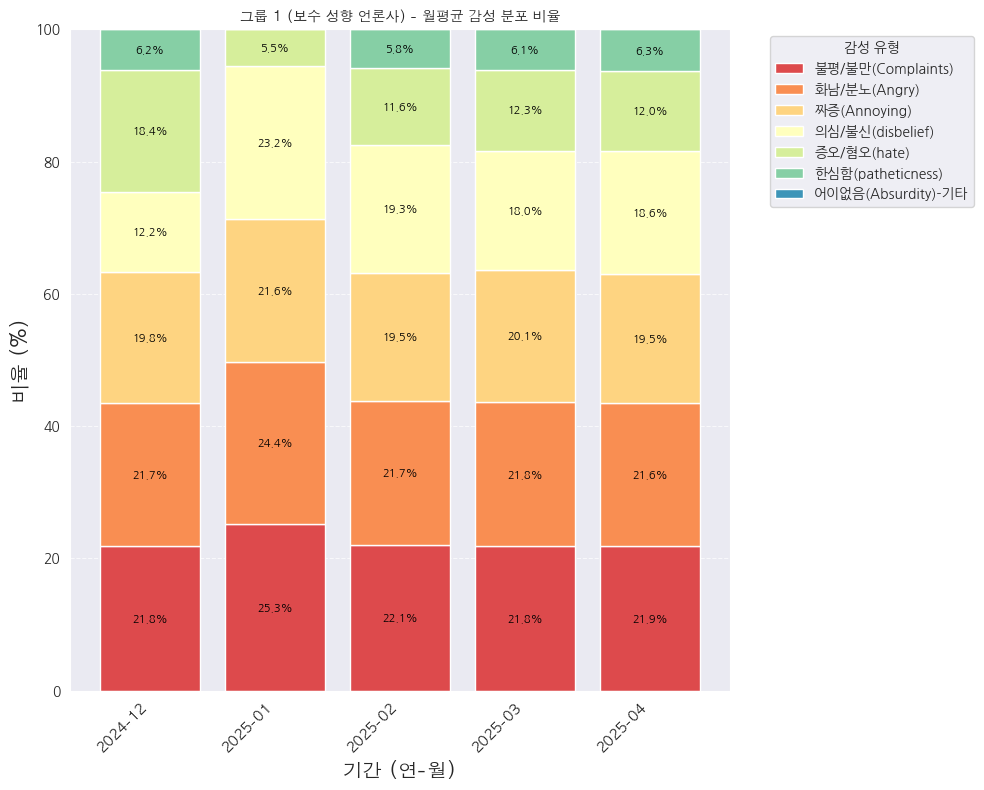


'그룹 1 (보수 성향 언론사)' 그룹의 월평균 감성 분포 차트 생성이 완료되었습니다.


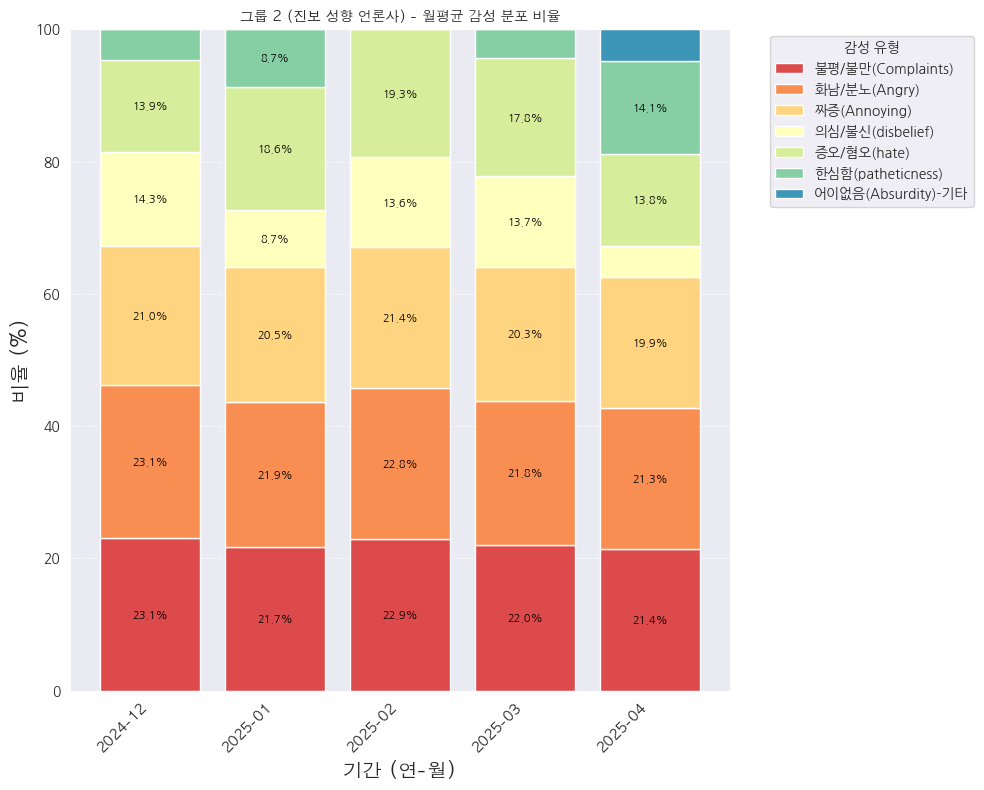


'그룹 2 (진보 성향 언론사)' 그룹의 월평균 감성 분포 차트 생성이 완료되었습니다.


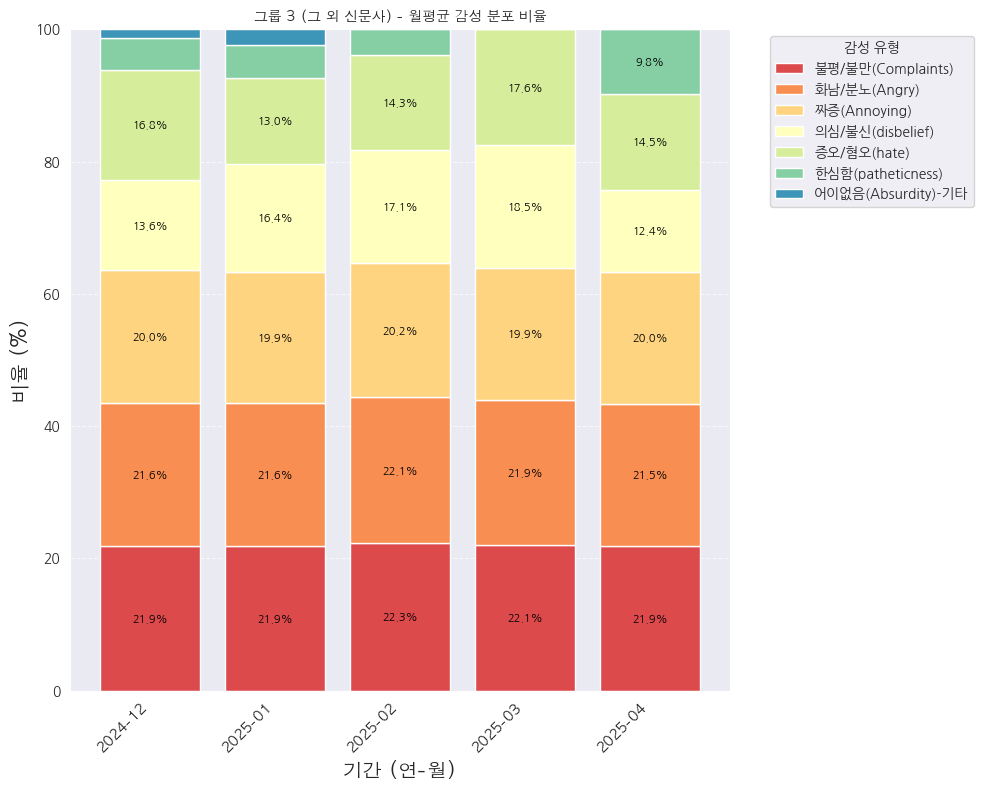


'그룹 3 (그 외 신문사)' 그룹의 월평균 감성 분포 차트 생성이 완료되었습니다.

--- 모든 언론사 그룹별 월평균 감성 분포 차트 생성이 완료되었습니다. ---


In [37]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import pandas as pd
import seaborn as sns
import numpy as np
import os

# 1) 프로젝트 내부 TTF 파일 경로
font_path = os.path.abspath("../src/NanumGothic.ttf")

# 2) matplotlib font_manager에 강제로 추가
fm.fontManager.addfont(font_path)

# 3) rcParams에 등록된 이름으로 설정
font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rcParams['font.family'] = font_name
mpl.rcParams['axes.unicode_minus'] = False

# → 이후 plt.title(..., fontproperties=font_prop) 안 써도,
#    plt.title("...", fontsize=14) 로 한글이 정상 출력됩니다.
# system = platform.system()
# if system == 'Windows':
#     try:
#         plt.rcParams['font.family'] = 'NanumGothic'
#         plt.rcParams['axes.unicode_minus'] = False
#         print("Matplotlib에 'Malgun Gothic' 폰트 설정 완료.")
#     except Exception as e:
#         print(f"Malgun Gothic 폰트 설정 중 오류 발생: {e}")
#         print("Malgun Gothic 폰트를 찾을 수 없습니다. NanumGothic을 시도합니다.")
#         try:
#             plt.rcParams['font.family'] = 'NanumGothic'
#             plt.rcParams['axes.unicode_minus'] = False
#             print("Matplotlib에 'NanumGothic' 폰트 설정 완료.")
#         except Exception as e_nanum:
#             print(f"NanumGothic 폰트 설정도 실패: {e_nanum}")
#             print("폰트 문제를 해결하지 못했습니다. 그래프에 한글이 깨질 수 있습니다.")
#             print("시스템에 '맑은 고딕' 또는 '나눔고딕' 폰트가 설치되어 있는지 확인해주세요.")


file_path = '../src/emotion_summary_by_month_press2.csv'

if not os.path.exists(file_path):
    print(f"\n오류: '{file_path}' 파일을 찾을 수 없습니다.")
    print("이 노트북 파일이 저장된 폴더에 '{file_path}' 파일을 직접 넣어주세요.")
    print(f"현재 작업 디렉토리: {os.getcwd()}")
    try:
        if os.name == 'nt':
            os.system('dir')
        else:
            os.system('ls -l')
    except Exception as cmd_e:
        print(f"파일 목록 확인 중 오류 발생: {cmd_e}")
    exit()

try:
    df = pd.read_csv(file_path, encoding='cp949')
    print(f"\nCSV 파일 ('{file_path}', cp949 인코딩) 불러오기 성공!")
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='euc-kr')
        print(f"\nCSV 파일 ('{file_path}', euc-kr 인코딩) 불러오기 성공!")
    except UnicodeDecodeError:
        print(f"\n오류: '{file_path}' 파일을 올바른 인코딩으로 디코딩할 수 없습니다.")
        print("cp949 및 euc-kr 인코딩으로도 실패했습니다. 파일의 인코딩을 확인해주세요.")
        exit()
except Exception as e:
    print(f"\n데이터 로딩 중 예상치 못한 오류 발생: {e}")
    exit()

print("\n데이터프레임 컬럼명:")
print(df.columns.tolist())

emotion_cols = [
    '불평/불만(Complaints)',
    '화남/분노(Angry)',
    '짜증(Annoying)',
    '의심/불신(disbelief)',
    '증오/혐오(hate)',
    '한심함(patheticness)',
    '어이없음(Absurdity)-기타'
]

existing_emotion_cols = [col for col in emotion_cols if col in df.columns]
if not existing_emotion_cols:
    print("\n오류: 지정된 감성 컬럼을 데이터프레임에서 찾을 수 없습니다. 컬럼명을 다시 확인해주세요.")
    print(f"데이터프레임의 실제 컬럼명: {df.columns.tolist()}")
    exit()

print(f"\n식별된 감성 컬럼: {existing_emotion_cols}")
emotion_cols = existing_emotion_cols

for col in emotion_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print("감성 컬럼 데이터 타입을 숫자형으로 변환 완료. (변환 불가 값은 NaN 처리)")

df[emotion_cols] = df[emotion_cols].fillna(0)


# --- 최종 비율 계산 (각 그룹의 총합에 대한 비율) ---
df_melted = df.melt(id_vars=['Year-Month-Media'], value_vars=emotion_cols,
                     var_name='Emotion_Type', value_name='Score')

df_melted['Group_Total_Score'] = df_melted.groupby('Year-Month-Media')['Score'].transform('sum')

df_melted['Ratio'] = np.where(df_melted['Group_Total_Score'] == 0, 0,
                               (df_melted['Score'] / df_melted['Group_Total_Score']) * 100) # 0-100% 스케일

# 새로운 'Year-Month' 컬럼 생성 (언론사 부분을 제외)
df_melted['Year-Month'] = df_melted['Year-Month-Media'].apply(lambda x: x.split('-')[0] + '-' + x.split('-')[1])
df_melted['Media_Outlet'] = df_melted['Year-Month-Media'].apply(lambda x: x.split('-')[2])

# 정렬 키로 'Year-Month'만 사용
df_long_sorted = df_melted.sort_values(by=['Year-Month'])


# --- 3. Matplotlib의 bar 함수를 이용한 100% 스택 바 차트 그리기 (비율 텍스트 추가) ---

print("\n--- 언론사 그룹별 월평균 감성 분포 통합 차트 생성을 시작합니다 ---")

# 언론사 그룹 정의
media_groups = {
    '그룹 1 (보수 성향 언론사)': ['조선일보', '중앙일보', '동아일보'],
    '그룹 2 (진보 성향 언론사)': ['JTBC', 'MBC', '한겨례', '경향신문', '오마이뉴스']
}

# 모든 언론사 이름을 가져와 '그 외 신문사' 그룹을 동적으로 생성
all_outlets_in_groups = set()
for group_list in media_groups.values():
    all_outlets_in_groups.update(group_list)

actual_all_media_outlets = set(df_long_sorted['Media_Outlet'].unique())
other_outlets = list(actual_all_media_outlets - all_outlets_in_groups)
other_outlets.sort() # 정렬하여 일관성 유지

if other_outlets:
    media_groups['그룹 3 (그 외 신문사)'] = other_outlets
else:
    print("\n'그룹 3 (그 외 신문사)'에 포함될 언론사가 없습니다.")

colors = sns.color_palette('Spectral', n_colors=len(emotion_cols))
color_map = {emotion_cols[i]: colors[i] for i in range(len(emotion_cols))}

# 그룹별 통합 시각화 루프
for group_name, outlets_in_group in media_groups.items():
    # 현재 그룹에 해당하는 언론사들의 데이터만 필터링
    df_group_filtered = df_long_sorted[df_long_sorted['Media_Outlet'].isin(outlets_in_group)].copy()

    if df_group_filtered.empty:
        print(f"\n경고: '{group_name}' 그룹에 해당하는 데이터가 없습니다. 이 그룹의 차트는 생성되지 않습니다.")
        continue # 데이터가 없으면 다음 그룹으로 넘어감

    # --- 핵심 변경 부분: 그룹 내 감성 비율을 월별로 평균내기 ---
    # 'Year-Month'와 'Emotion_Type' 기준으로 그룹화하고 'Ratio'의 평균을 계산
    df_group_avg = df_group_filtered.groupby(['Year-Month', 'Emotion_Type'])['Ratio'].mean().reset_index()

    # 'Year-Month' 기준으로 다시 정렬하여 시간 순서 보장
    df_group_avg['Sort_Key_Date'] = df_group_avg['Year-Month'].str.replace('-', '') # 정렬용 키 생성
    df_group_avg = df_group_avg.sort_values(by='Sort_Key_Date')
    # ----------------------------------------------------

    x_labels = df_group_avg['Year-Month'].unique()
    x_positions = np.arange(len(x_labels))

    # 차트 생성
    fig_width = max(10, len(x_labels) * 0.7) # 최소 10인치, 레이블이 많아지면 더 길게
    fig, ax = plt.subplots(figsize=(fig_width, 8))

    bottom = np.zeros(len(x_labels)) # 각 막대의 시작점

    for emotion_type in emotion_cols:
        # 평균 비율 데이터 가져오기 (reindex로 모든 월에 대해 값 보장)
        ratios = df_group_avg[df_group_avg['Emotion_Type'] == emotion_type] \
                    .set_index('Year-Month').reindex(x_labels)['Ratio'].fillna(0)

        # 막대 그리기
        bars = ax.bar(
            x_positions,
            ratios,
            bottom=bottom,
            label=emotion_type,
            color=color_map.get(emotion_type, 'gray'),
        )

        # 각 막대 조각 위에 비율 텍스트 추가
        for i, bar in enumerate(bars):
            height = bar.get_height()
            if height > 5:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bottom[i] + height / 2,
                    f'{height:.1f}%',
                    ha='center', va='center',
                    color='black',
                    fontsize=8,
                    weight='bold'
                )
        bottom += ratios

    ax.set_title(f'{group_name} - 월평균 감성 분포 비율', fontsize=18,fontproperties=font_prop)
    ax.set_xlabel('기간 (연-월)', fontsize=14 ,fontproperties=font_prop)
    ax.set_ylabel('비율 (%)', fontsize=14 ,fontproperties=font_prop)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=10,fontproperties=font_prop) # X축 레이블이 더 짧아져서 45도로 충분
    ax.set_yticks(np.arange(0, 101, 20))
    ax.set_ylim(0, 100)
    ax.legend(title='감성 유형', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(f"\n'{group_name}' 그룹의 월평균 감성 분포 차트 생성이 완료되었습니다.")

print("\n--- 모든 언론사 그룹별 월평균 감성 분포 차트 생성이 완료되었습니다. ---")